# Heart Disease Machine Learning Analysis and Prediction
#### 1. Applied 4 Type of Data Preprocessings: Raw, StandardScaler, MinMaxScaler and Log transform features for each model.
#### 2. Implemented 10 classic Machine Learning models and one ANN model. 
#### 3. Implemented Plot_Learning_Curve, which can plot learning curves, scalability of the model and performance of the model. 
#### 4. There are 5 models the recall reached 93.5 % with the small sample size (303).

# Kaggle Dataset

Here is Kaggle Dataset link#https://www.kaggle.com/johnsmith88/heart-disease-dataset


# Dataset Featureas
- `Age` : Age of the patient

- `Sex` : Sex of the patient (0 = female; 1 = male)

- `exang`: exercise induced angina (1 = yes; 0 = no)

- `ca`: number of major vessels (0-3)

- `cp` : Chest Pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic   
    
- `trestbps` : resting blood pressure (in mm Hg)

- `chol` : cholestoral in mg/dl fetched via BMI sensor

- `fbs` : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- `restecg` : resting electrocardiographic results

    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
    
- `thalach` : maximum heart rate achieved

- `slope`: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping

- `oldpeak`:  ST depression induced by exercise relative to rest

- `thal`: Thallium Stress Test result ~ (0,3)

- `target` : 0 = less chance of heart attack, 1 = more chance of heart attack



## Install catboost, eli5; Import Dependences 

In [1]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 22 kB/s 


In [3]:
!pip install eli5

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Charts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from keras.utils.vis_utils import plot_model

#  Models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgbm
import catboost as ctb


# Preprocessing
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Scoring
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix

# Hyperparameters and features importance
from sklearn.model_selection import GridSearchCV
import eli5
from eli5.sklearn import PermutationImportance

# remove verison errors
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


## Loading the dataset

In [ ]:
#path = '/kaggle/input/heart-attack-analysis-prediction-dataset/'

#df_heart = pd.read_csv(path + 'heart.csv')

In [5]:
df_heart = pd.read_csv("/content/heart.csv")

## The size of the dataset

In [6]:
df_heart.shape

(1025, 14)

In [7]:
df_heart.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0  ...      0      1.0      2   2     3       0
1   53    1   0       140   203    1  ...      1      3.1      0   0     3       0
2   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
3   61    1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62    0   0       138   294    1  ...      0      1.9      1   3     2       0

[5 rows x 14 columns]

# EDA: Exploratory data analysis

## Basic info

In [8]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Sample data

In [13]:
df_heart.sample(15)

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
56    56    1   3       120   193    0  ...      0      1.9      1   0     3       1
227   44    0   2       118   242    0  ...      0      0.3      1   1     2       1
363   53    1   2       130   246    1  ...      0      0.0      2   3     2       1
733   44    0   2       108   141    0  ...      0      0.6      1   0     2       1
739   52    1   0       128   255    0  ...      1      0.0      2   1     3       0
5     58    0   0       100   248    0  ...      0      1.0      1   0     2       1
282   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
72    56    1   0       125   249    1  ...      1      1.2      1   1     2       0
254   35    1   0       120   198    0  ...      1      1.6      1   0     3       0
694   39    1   0       118   219    0  ...      0      1.2      1   0     3       0
160   77    1   0       125   304    0  ...      1      0.0      2   3     2       0
270   43    1   0       110   211    0  ...      0      0.0      2   0     3       1
158   67    0   2       115   564    0  ...      0      1.6      1   0     3       1
47    66    0   0       178   228    1  ...      1      1.0      1   2     3       0
237   57    1   1       124   261    0  ...      0      0.3      2   0     3       0

[15 rows x 14 columns]

## Checking missing values

In [9]:
df_heart.isnull().sum().sum()

0

#### There are no NaN values in the dataset.

## Checking duplicates

In [10]:
df_heart.duplicated().sum()  # more than 2/3 of data are duplicated!

723

## Removing duplicates

In [11]:
df_heart.drop_duplicates(inplace=True)

In [12]:
df_heart.shape

(302, 14)

## Divide features to categorical, continous and label columns

In [15]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang','slope', 'ca','thal'] # 8
continous_cols = ['age', 'trestbps', 'chol','thalach', 'oldpeak'] # 5
label_col = ['target']

name_change = {
    'sex': {'0': 'female', '1': 'male'}, 
    'fbs': {'0': 'false', '1': 'true'}, 
    'exang': {'0': 'no', '1': 'yes'},
    'cp': {'0': 'typical angina', '1': 'atypical angina', '2': 'non-anginal pain', '3': 'asymptomatic'},
    'restecg': {'0': 'normal', '1': 'having ST-T wave abnormality', '2': 'showing probable or definite left ventricular hypertrophy'},
    'ca': {'0': '0 vessels', '1': '1 vessels', '2': '2 vessels', '3': '3 vessels', '4': '4 vessels'}, 
    'slope': {'0': '0', '1': '1', '2': '2'},
    'thal': {'0': '0', '1': '1', '2': '2', '3': '3'}, 
}

## Statistics continous columns

In [17]:
df_heart[continous_cols].describe().T

count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
trestbps  302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
thalach   302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2

## Distribution of continuous features

### Colors to charts

In [18]:
mycolors = ['red', 'blue', 'brown', 'orange']

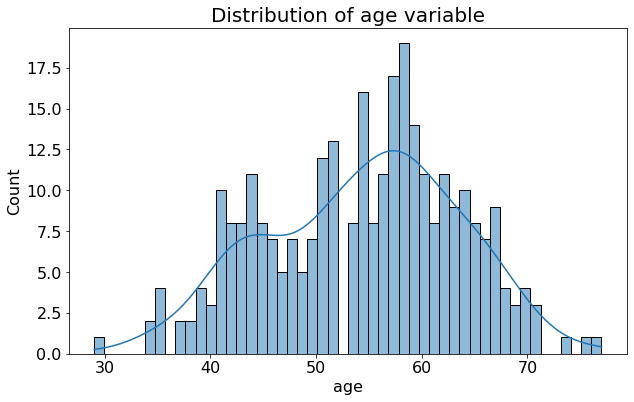

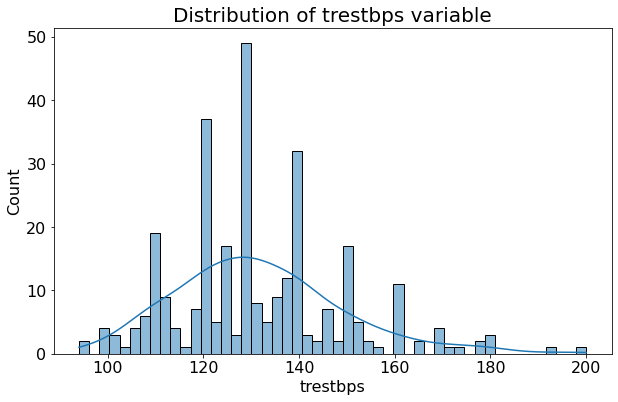

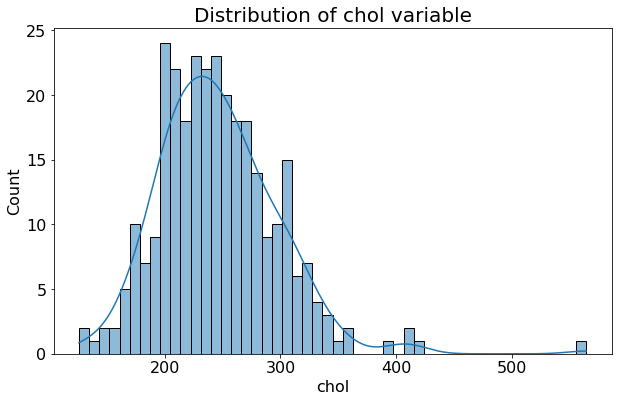

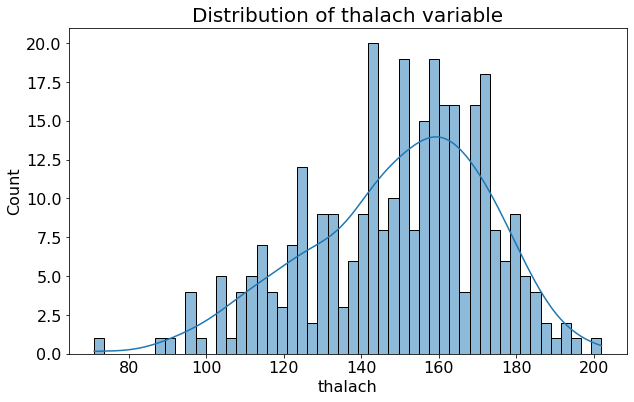

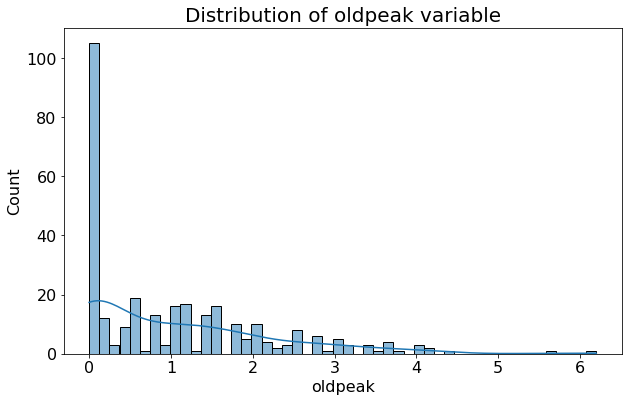

In [19]:
cnt = 0
max_in_row = 1
for x in continous_cols:
    data = df_heart[x]
    plt.figure(cnt//max_in_row, figsize=(10,6))
    plt.subplot(1, max_in_row, (cnt)%max_in_row + 1)
    plt.title(f'Distribution of {x} variable', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    sns.histplot(data, bins = 50, kde=50);
    cnt += 1

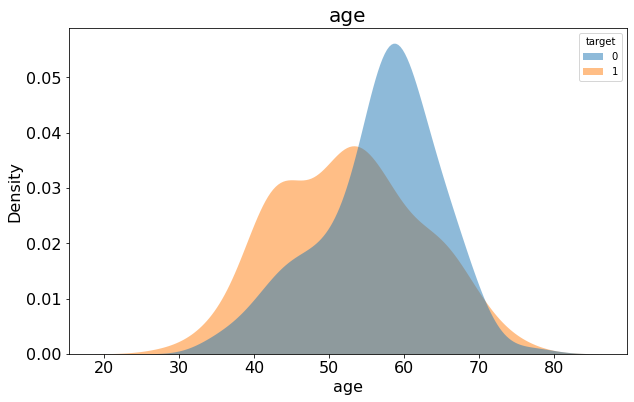

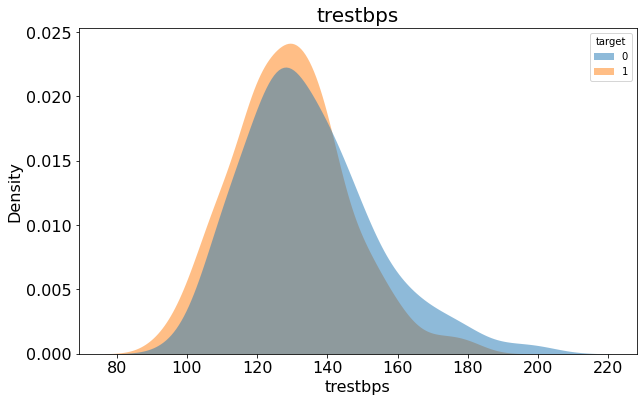

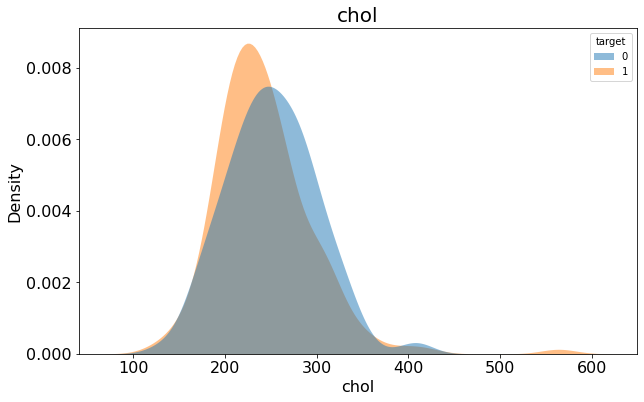

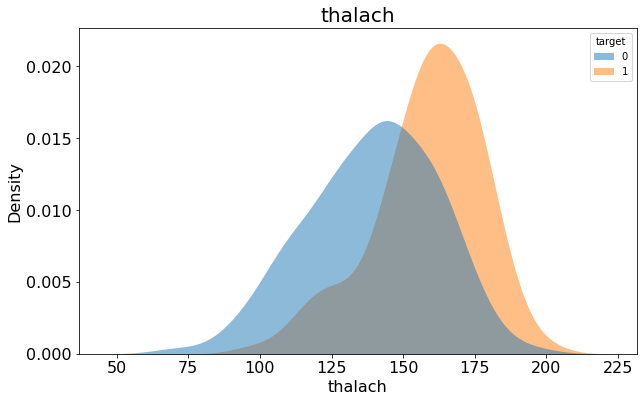

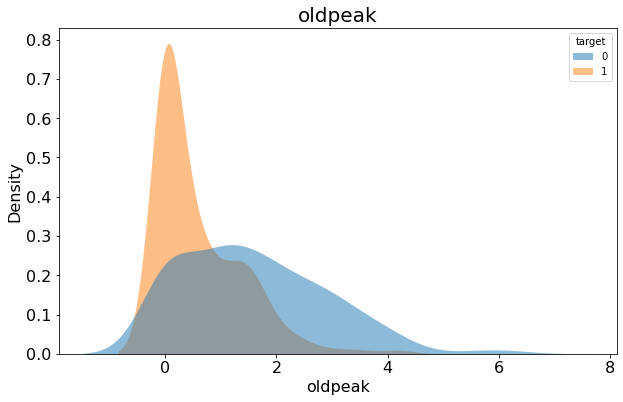

In [21]:
cnt = 0
max_in_row = 1
for x in continous_cols:
    plt.figure(cnt//max_in_row, figsize=(10,6))
    plt.subplot(1, max_in_row, (cnt)%max_in_row + 1)
    plt.title(x, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    sns.kdeplot(data=df_heart, x=x, hue="target", fill=True, common_norm=False, alpha=.5, linewidth=0);
    cnt += 1

## Get insight of Data
1.`age`:
   * Most people get a heart attack at the age of 50.
   
2.`chol`:
   * People with higher cholesterol are less likely to get a heart attack.
   
3.`thalach`:
   * People with a higher maximum heart rate are more likely to have a heart attack.


## Boxplot of continuous features

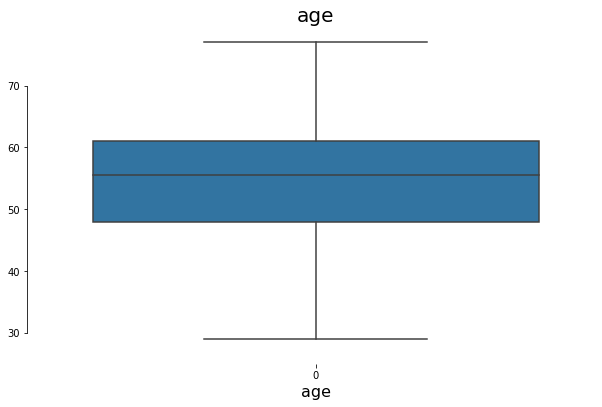

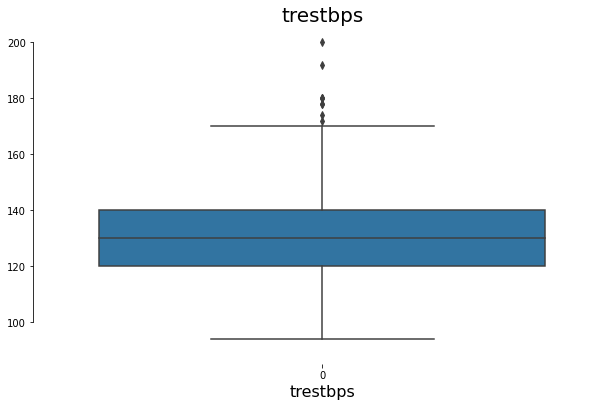

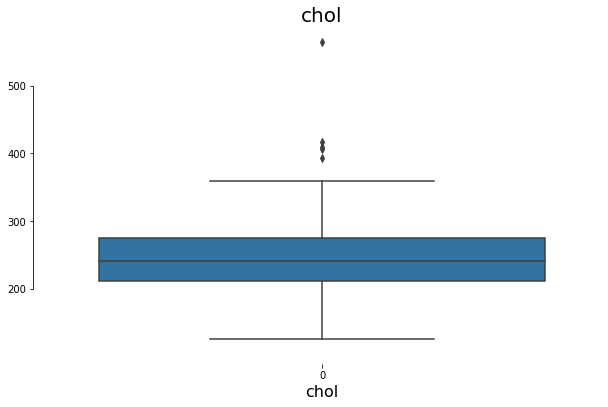

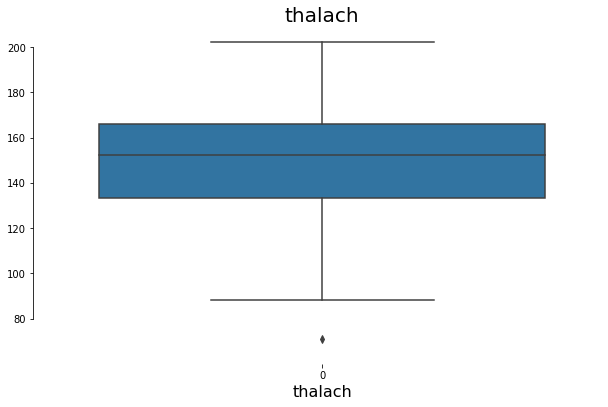

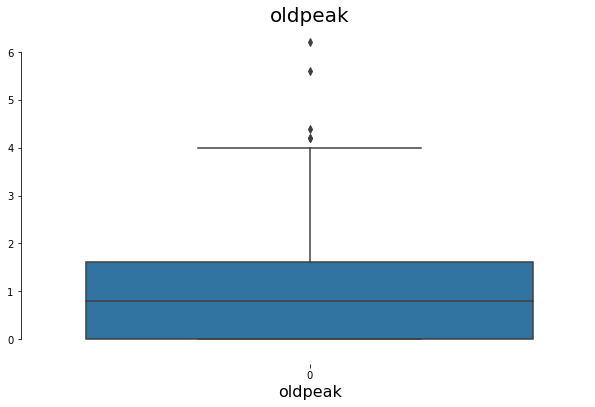

In [22]:
cnt = 0
max_in_row = 1
for x in continous_cols:
    data = df_heart[x]
    plt.figure(cnt//max_in_row, figsize=(10,6))
    plt.subplot(1, max_in_row, (cnt)%max_in_row + 1)
    plt.title(x, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(x, fontsize=16)
    sns.boxplot(data = data);
    sns.despine(offset=10, trim=True);
    cnt += 1

## Barplot of the categorical features

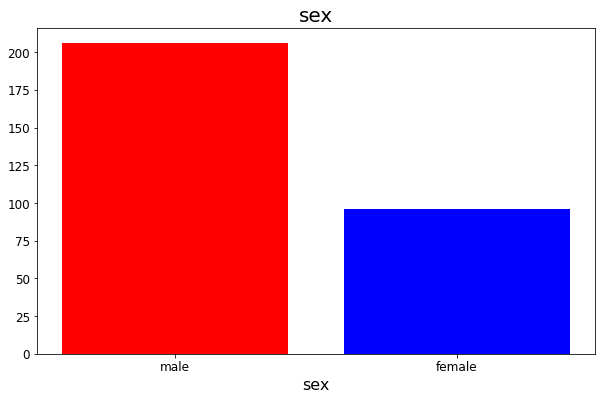

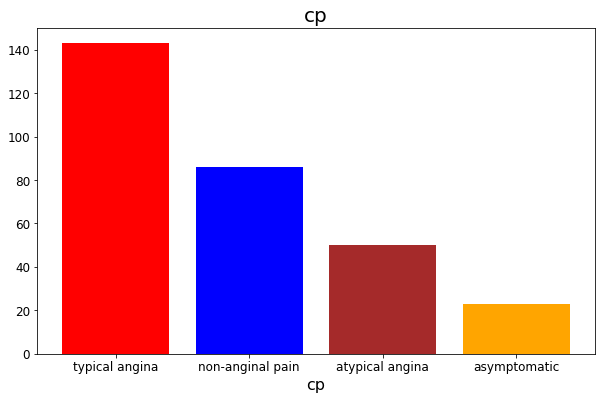

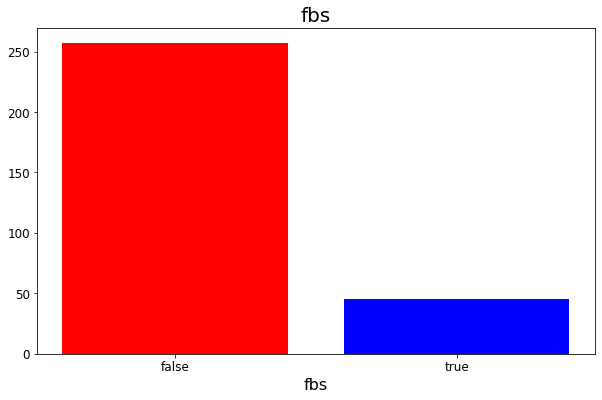

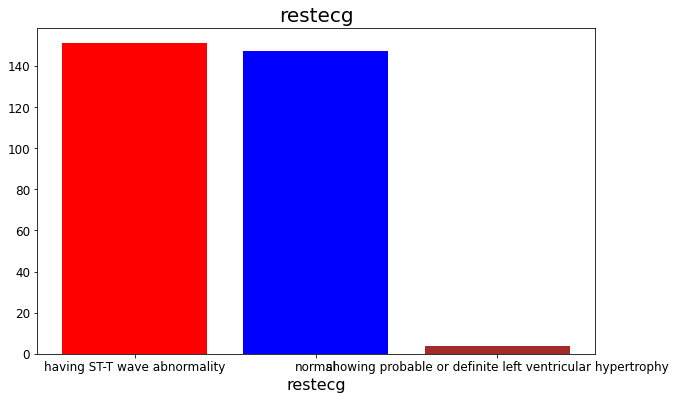

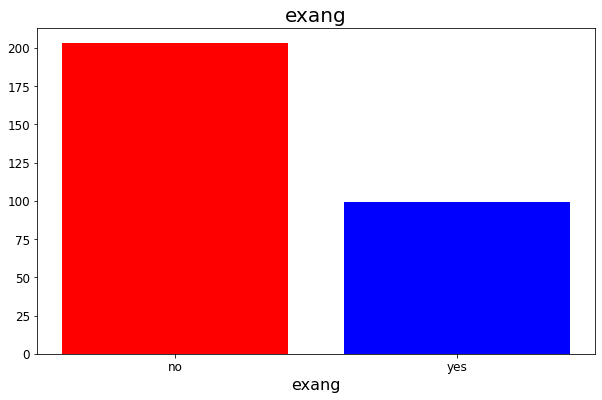

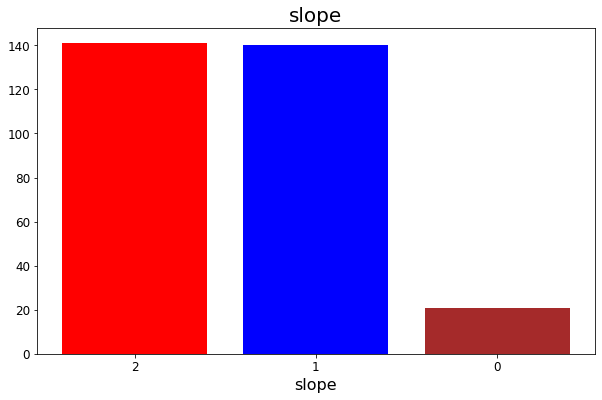

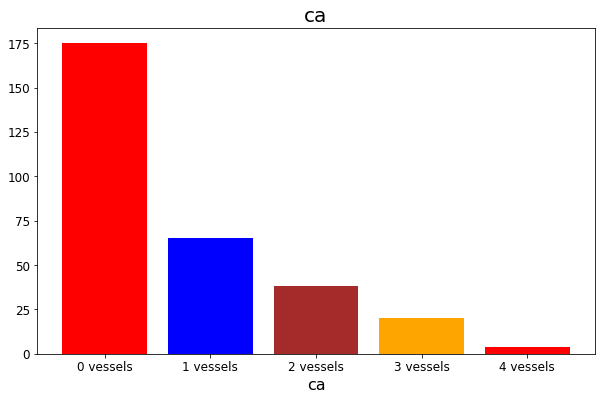

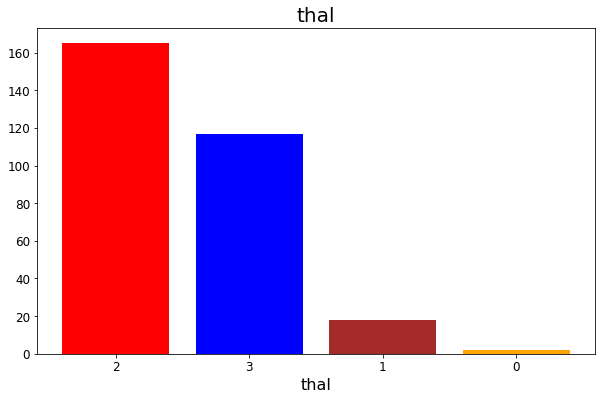

In [23]:
cnt = 0
max_in_row = 1
for x in categorical_cols:
    val1 = df_heart[x].value_counts().index
    val1 = [name_change[x][str(val)] for val in val1]
    cnt1 = df_heart[x].value_counts().values
    plt.figure(cnt//max_in_row, figsize=(10,6))
    plt.subplot(1, max_in_row, (cnt)%max_in_row + 1)
    plt.title(x, fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(x, fontsize=16)
    plt.bar(val1, cnt1, color=mycolors);
    cnt += 1

### There are more men than women in the dataset

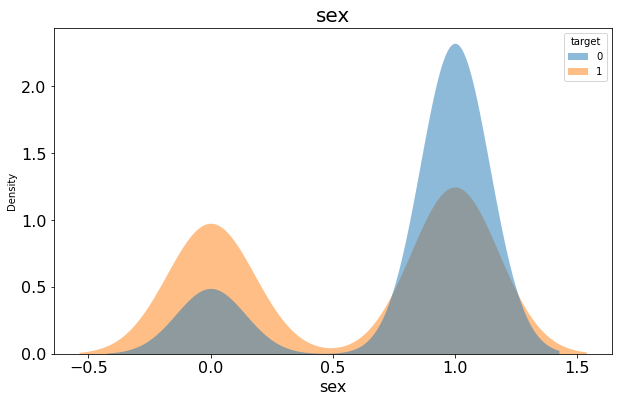

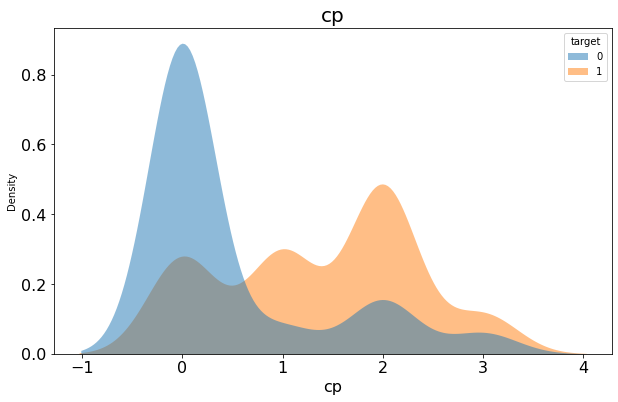

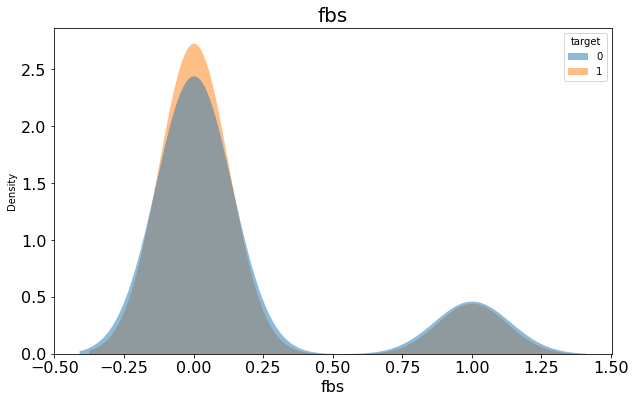

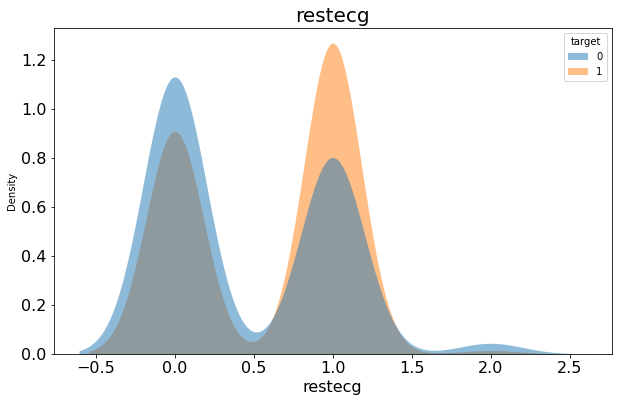

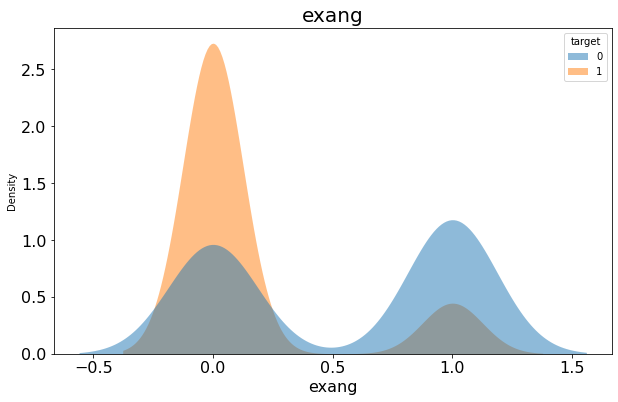

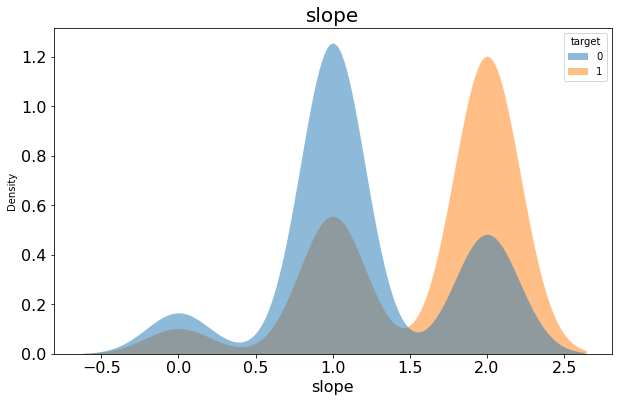

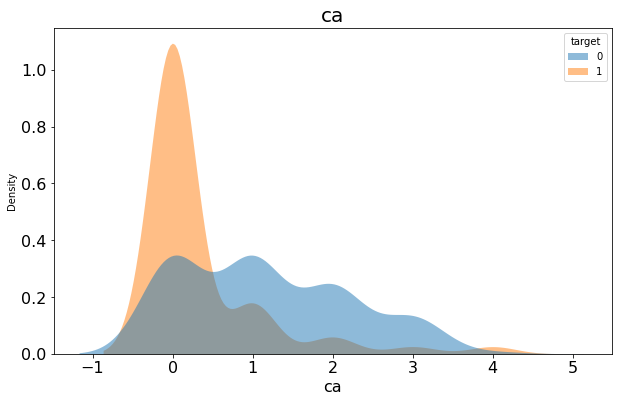

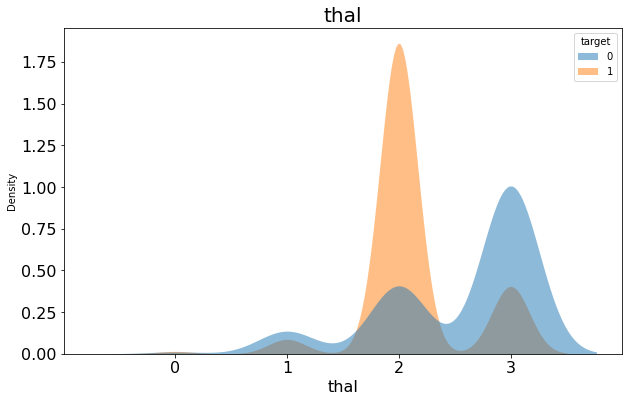

In [25]:
cnt = 0
max_in_row = 1
for x in categorical_cols:
    plt.figure(cnt//max_in_row, figsize=(10,6))
    plt.subplot(1, max_in_row, (cnt)%max_in_row + 1)
    plt.title(x, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(x, fontsize=16)
    sns.kdeplot(data=df_heart, x=x, hue="target", fill=True, common_norm=False, alpha=.5, linewidth=0,);
    cnt += 1

## Get Insight of Data
1.`sex`:
   * Male (`sex` = 1 ) has higher chance of heart attack
   
2.`cp`:
   * People with non-anginal pain (`cp` = 2 ) have higher chances of heart attack.
   
3.`restecg`:
   * People with having ST-T wave abnormality (`restecg` = 1 ) have higher chance of heart attack.

4.`exang`:
   * People with no exercise induced angina (`exang` = 0 ) have higher chance of heart attack.

5.`slope`:
   * People with the downslope of the peak exercise ST segment (`slope` = 2 ) have higher chance of heart attack.

6.`ca`:
   * People with 0 major vessels have a very higher chance of heart attack 

7.`thal`:
   * People with thal = 2 have higher chance of heart attack

## Count of the target 

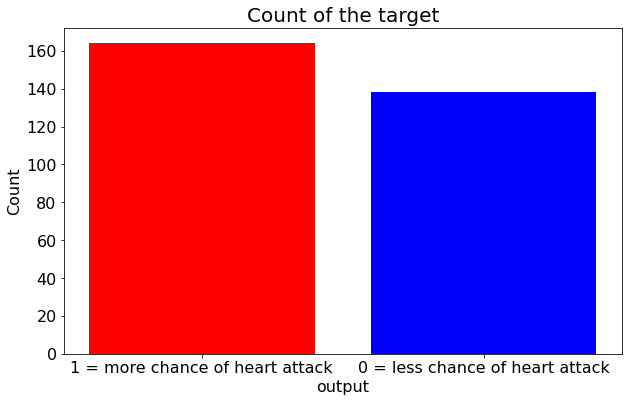

In [26]:
f1 = df_heart['target'].map(lambda x:  '1 = more chance of heart attack' if x == 1 else '0 = less chance of heart attack')

plt.figure(figsize=(10,6))
val = f1.value_counts().index
cnt = f1.value_counts().values

plt.title('Count of the target', size=20)
plt.tick_params(labelsize=16)
plt.ylabel('Count', size=16)
plt.xlabel('output', size=16)
plt.bar(val, cnt, color = mycolors);
plt.show()

#### In dataset we have more cases with option `1`

## Heatmap Correlation Matrix

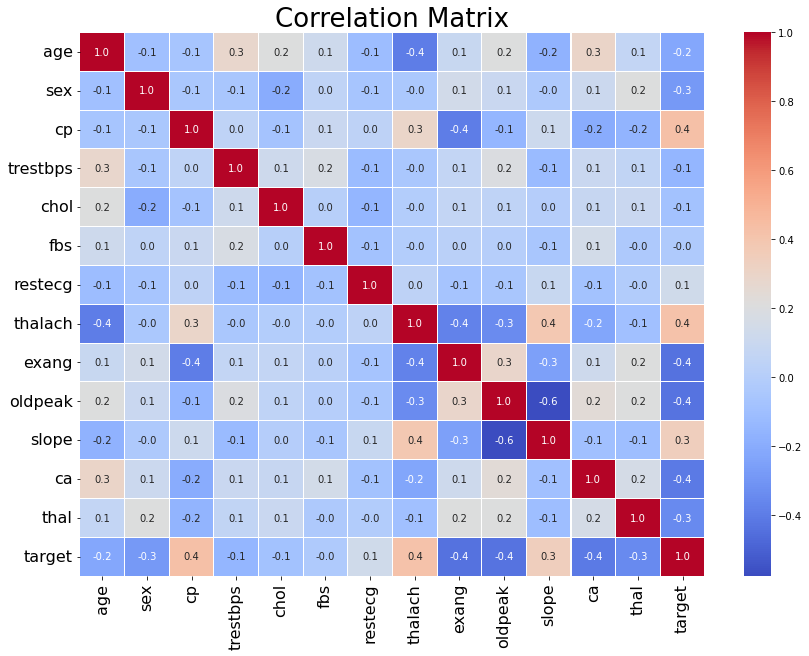

In [27]:
plt.figure(figsize = (14, 10))
sns.heatmap(df_heart.corr(), cmap = "coolwarm", annot=True, fmt='.1f', linewidths=0.1);
plt.yticks(rotation=0, size=16)
plt.xticks(rotation=90, size=16)
plt.title('Correlation Matrix', size=26)
plt.show()

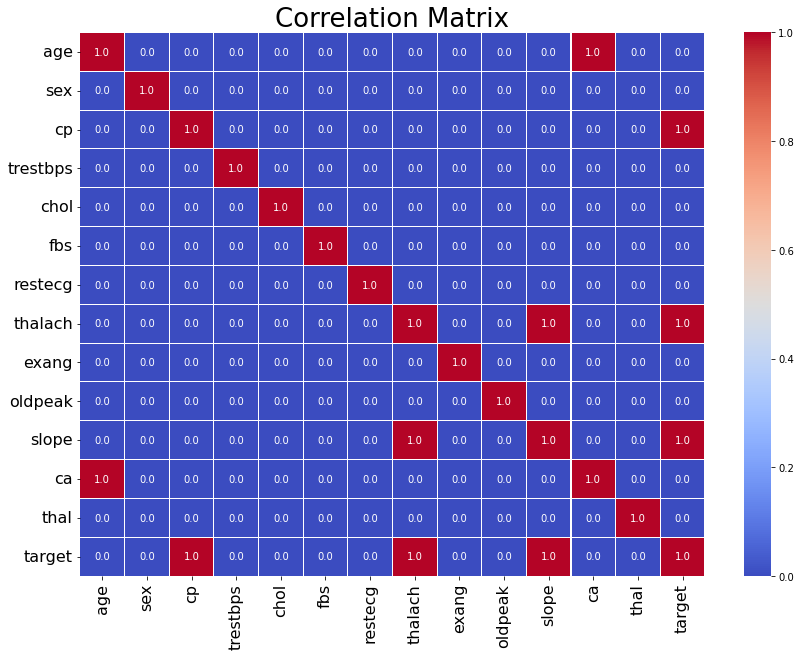

In [29]:
plt.figure(figsize = (14, 10))
sns.heatmap(df_heart.corr()>=0.3, cmap = "coolwarm", annot=True, fmt='.1f', linewidths=0.1);
plt.yticks(rotation=0, size=16)
plt.xticks(rotation=90, size=16)
plt.title('Correlation Matrix', size=26)
plt.show()

#### As we can see, the variables weekly correlate with each other

## Pairplot according to target variable

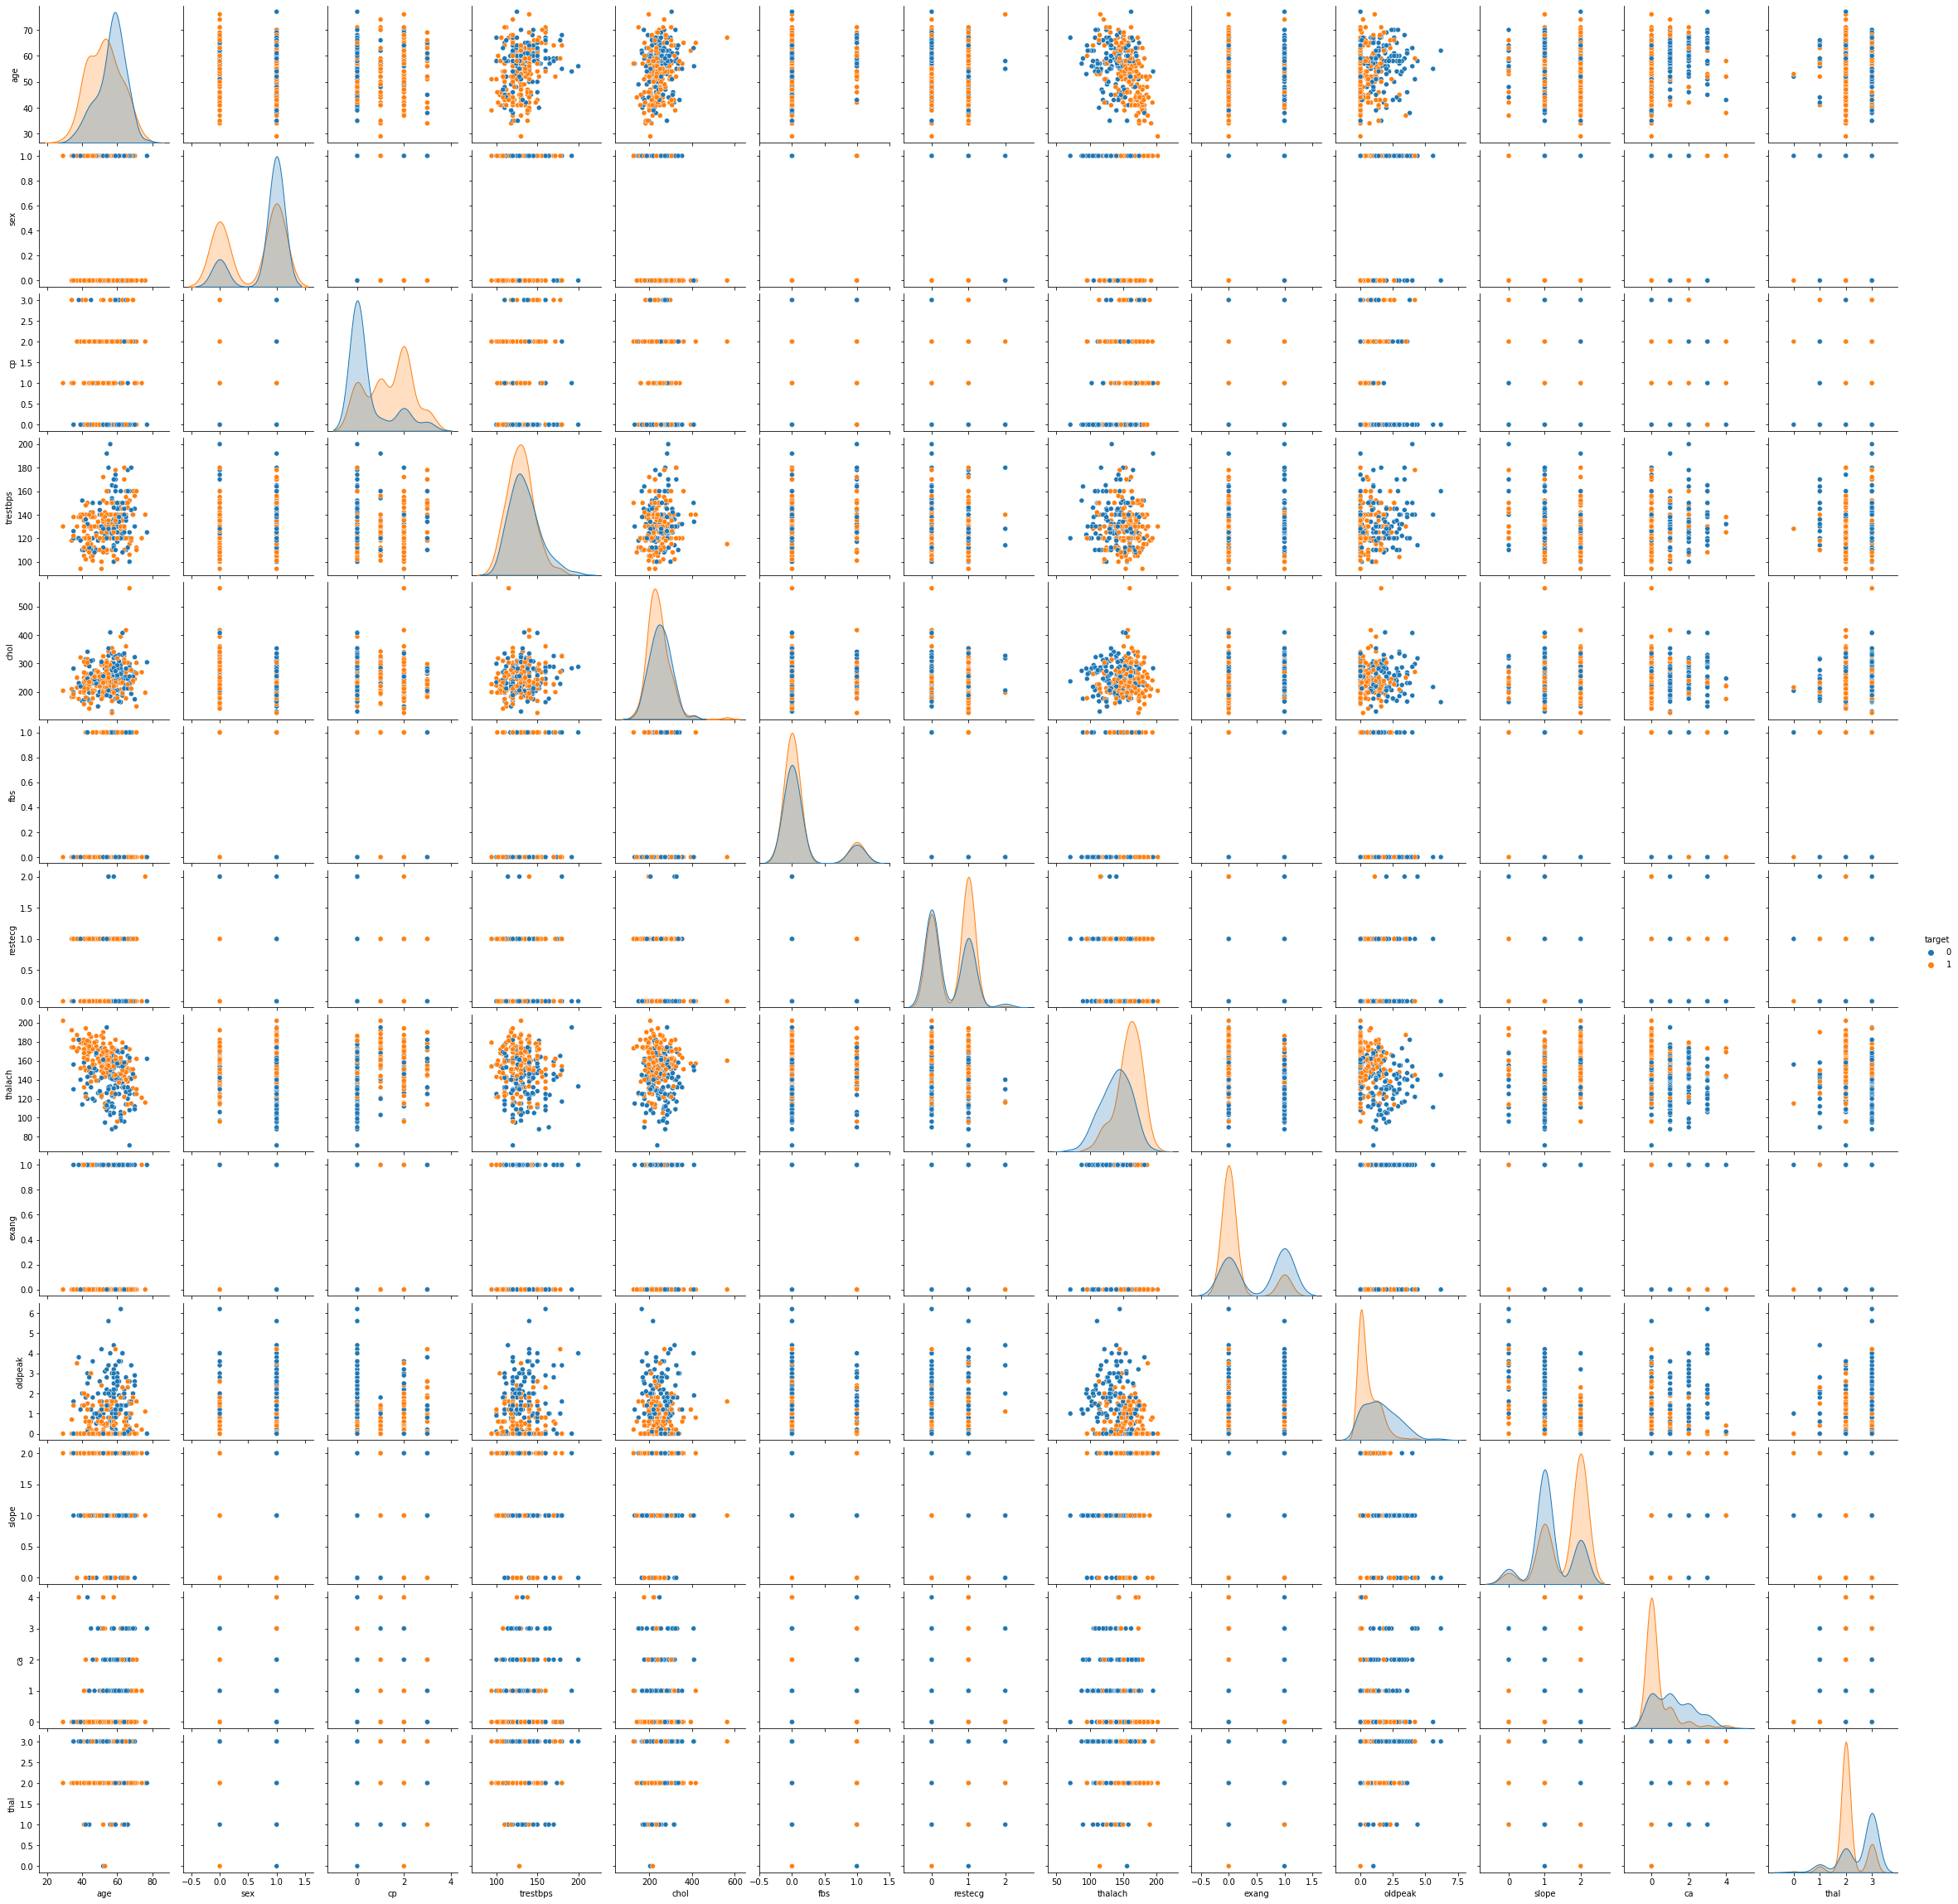

In [30]:
sns.pairplot(df_heart, hue='target');

## Data Preprocessing, StandardScaler, MinMaxScaler and Log Transform Features

In [33]:
# df_heart = pd.get_dummies(df_heart, columns = categorical_cols)

X = df_heart.drop(['target'],axis=1)
y = df_heart['target']

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

X_train_log = X_train.copy()
X_test_log = X_test.copy()

scaler = StandardScaler()
X_train_stand[continous_cols] = scaler.fit_transform(X_train_stand[continous_cols])
X_test_stand[continous_cols] = scaler.transform(X_test_stand[continous_cols])

norm = MinMaxScaler()
X_train_norm[continous_cols] = norm.fit_transform(X_train_norm[continous_cols])
X_test_norm[continous_cols] = norm.transform(X_test_norm[continous_cols])

X_train_log["age"]= np.log(X_train.age)
X_train_log["trestbps"]= np.log(X_train.trestbps)
X_train_log["chol"]= np.log(X_train.chol)
X_train_log["thalach"]= np.log(X_train.thalach)

X_test_log["age"]= np.log(X_test.age)
X_test_log["trestbps"]= np.log(X_test.trestbps)
X_test_log["chol"]= np.log(X_test.chol)
X_test_log["thalach"]= np.log(X_test.thalach)

In [34]:
X_train_norm.tail()

age  sex  cp  trestbps      chol  ...  exang   oldpeak  slope  ca  thal
47   0.770833    0   0  0.792453  0.224018  ...      1  0.161290      1   2     3
129  0.583333    1   0  0.433962  0.140878  ...      0  0.064516      1   0     1
158  0.791667    0   2  0.198113  1.000000  ...      0  0.258065      1   0     3
62   0.791667    1   0  0.056604  0.387991  ...      1  0.145161      1   2     2
142  0.666667    1   3  0.377358  0.237875  ...      0  0.419355      1   2     2

[5 rows x 13 columns]

## Implementation of Plot Learning Curve

In [35]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="b")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="b",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


## Using functions to train and predict models

In [36]:
def train_model(model, X, y):
    model.fit(X, y)
    return model


def predict_model(model, X, proba=False):
    if ~proba:
        y_pred = model.predict(X)
    else:
        y_pred_proba = model.predict_proba(X)
        y_pred = np.argmax(y_pred_proba, axis=1)

    return y_pred


list_scores = []

def run_model(name, model, X_train, X_test, y_train, y_test, fc, proba=False):
    print(name)
    print(fc)
    
    model1 = train_model(model, X_train, y_train)
    y_pred = predict_model(model1, X_test, proba)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(y_pred,'\n')
    print('accuracy: ', accuracy)
    print('recall: ',recall)
    print('precision: ', precision)
    print('f1: ', f1)
    print(classification_report(y_test, y_pred))
    
    
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues');    
    plt.show()
    plot_learning_curve(estimator=model, title="Learning Curve", X=X_train, y=y_train, cv=3);    
    plt.show()
    
    list_scores.append({'Model Name': name, 'Feature Scaling':fc, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1':f1})

In [37]:
feature_scaling = {
    'Raw':(X_train_raw, X_test_raw, y_train, y_test),
    'Normalization':(X_train_norm, X_test_norm, y_train, y_test),
    'Standardization':(X_train_stand, X_test_stand, y_train, y_test),
    'Log':(X_train_log, X_test_log, y_train, y_test),
}

## Training Models

SVC
Raw
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8688524590163934
recall:  0.9354838709677419
precision:  0.8285714285714286
f1:  0.8787878787878788
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.83      0.94      0.88        31

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



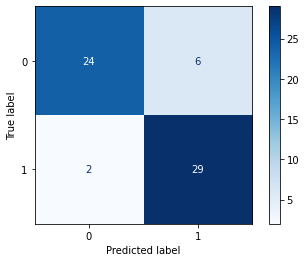

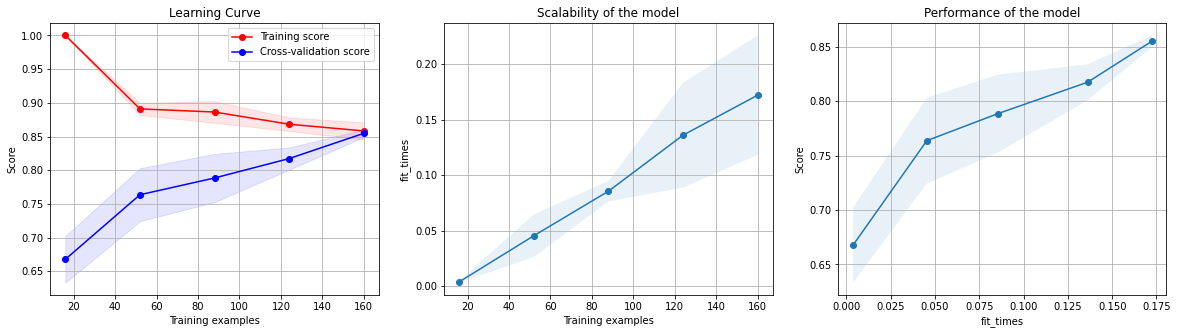

SVC
Normalization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9354838709677419
precision:  0.8055555555555556
f1:  0.8656716417910448
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.81      0.94      0.87        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



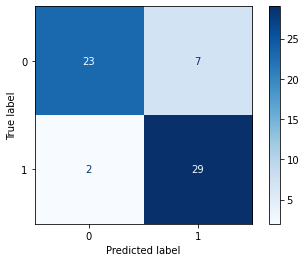

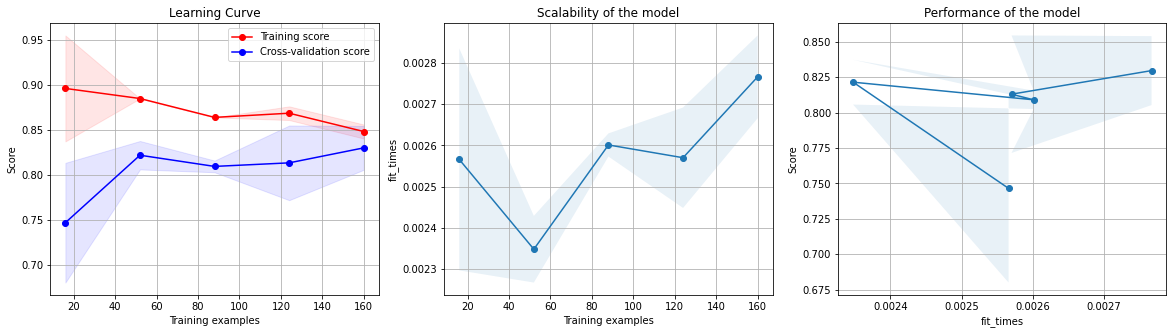

SVC
Standardization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8688524590163934
recall:  0.9354838709677419
precision:  0.8285714285714286
f1:  0.8787878787878788
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.83      0.94      0.88        31

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



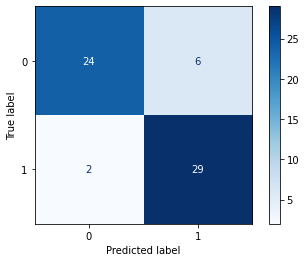

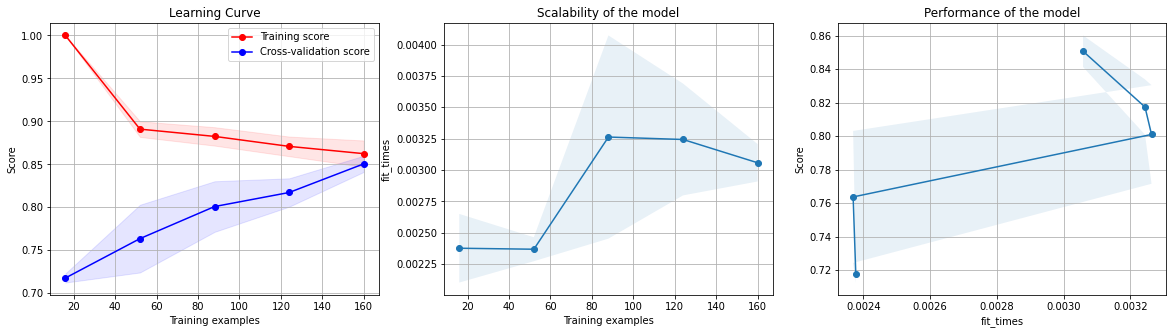

SVC
Log
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9354838709677419
precision:  0.8055555555555556
f1:  0.8656716417910448
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.81      0.94      0.87        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



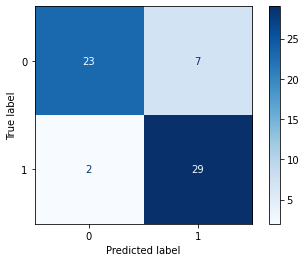

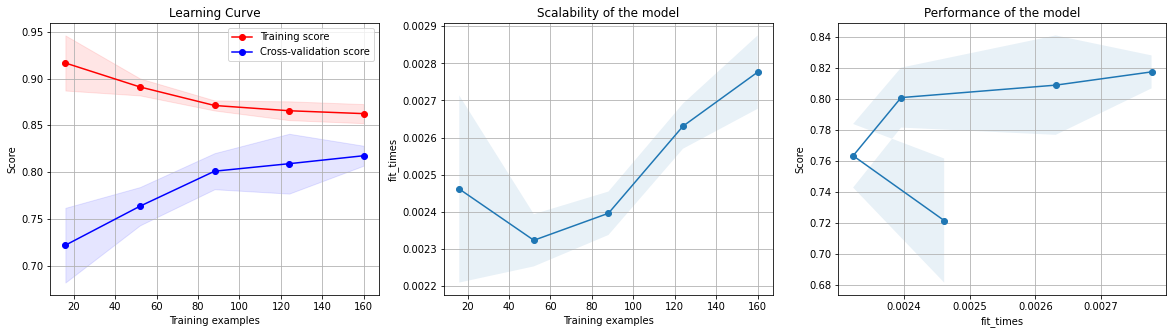

In [38]:
model_svc = SVC(kernel='linear', C=1, random_state=2021)

for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    run_model('SVC', model_svc, X_train, X_test, y_train, y_test, fc_name)

Tuning SVC
Raw
[1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1
 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.7213114754098361
recall:  0.8387096774193549
precision:  0.6842105263157895
f1:  0.7536231884057972
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        30
           1       0.68      0.84      0.75        31

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



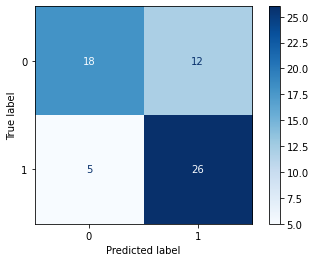

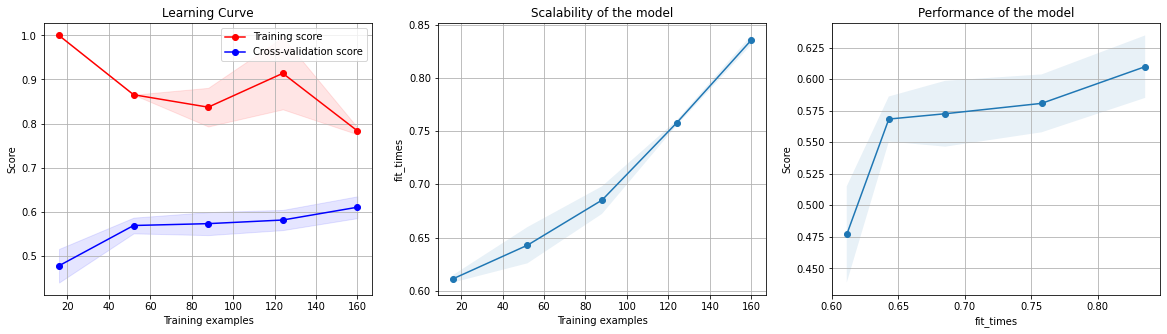

Tuning SVC
Normalization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1] 

accuracy:  0.9016393442622951
recall:  0.9354838709677419
precision:  0.8787878787878788
f1:  0.90625
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.94      0.91        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



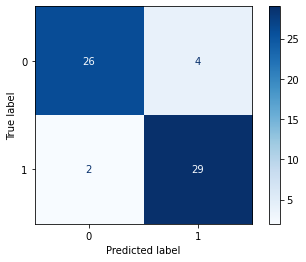

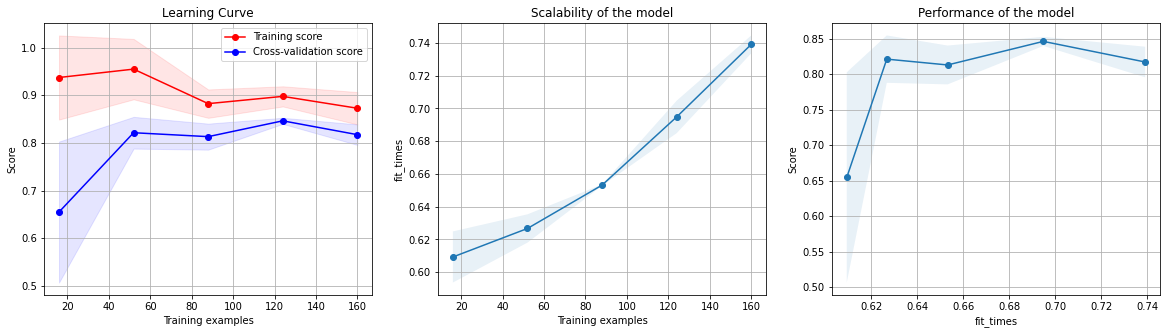

Tuning SVC
Standardization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.819672131147541
recall:  0.9354838709677419
precision:  0.7631578947368421
f1:  0.8405797101449276
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        30
           1       0.76      0.94      0.84        31

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



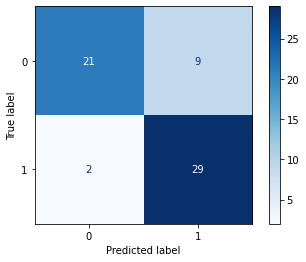

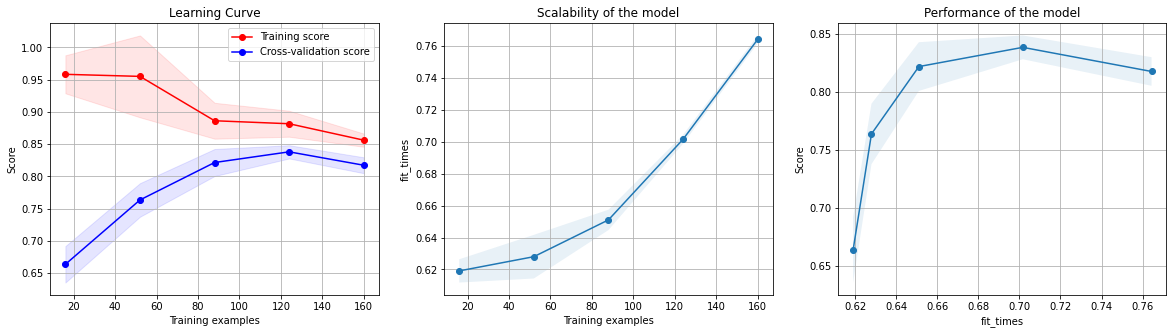

Tuning SVC
Log
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1] 

accuracy:  0.8852459016393442
recall:  0.9354838709677419
precision:  0.8529411764705882
f1:  0.8923076923076922
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



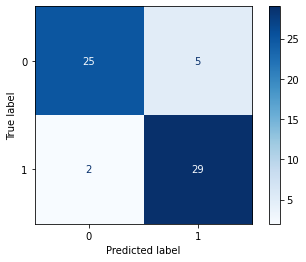

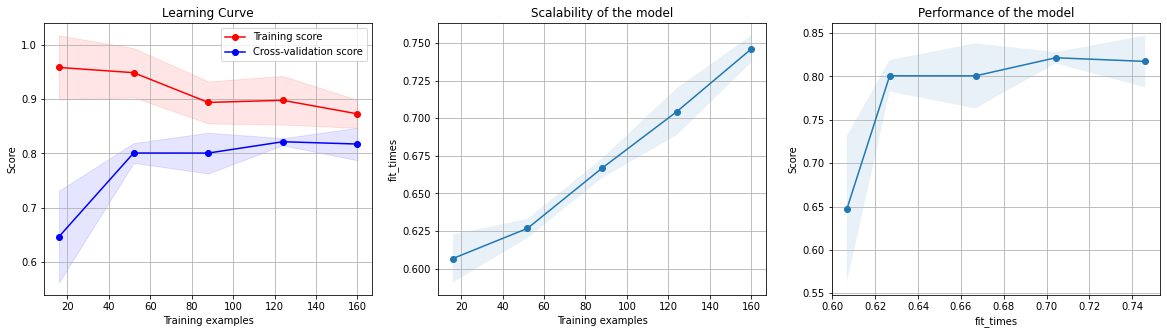

In [39]:
for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    svm = SVC()
    parameters = { 'C':np.arange(1,5,1),'gamma':[0.001, 0.005, 0.01, 0.05, 0.09, 0.1, 0.2, 0.5,1]}
    searcher = GridSearchCV(svm, parameters)
    
    run_model('Tuning SVC', searcher, X_train, X_test, y_train, y_test, fc_name )

Logistic Regression
Raw
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8852459016393442
recall:  0.9354838709677419
precision:  0.8529411764705882
f1:  0.8923076923076922
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



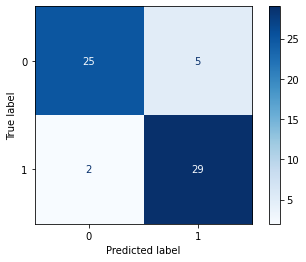

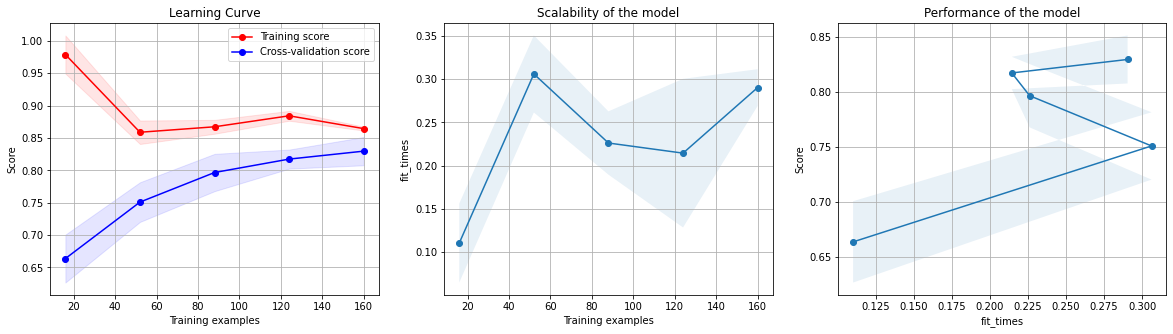

Logistic Regression
Normalization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8852459016393442
recall:  0.9354838709677419
precision:  0.8529411764705882
f1:  0.8923076923076922
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



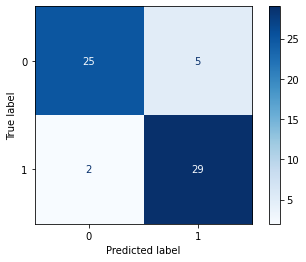

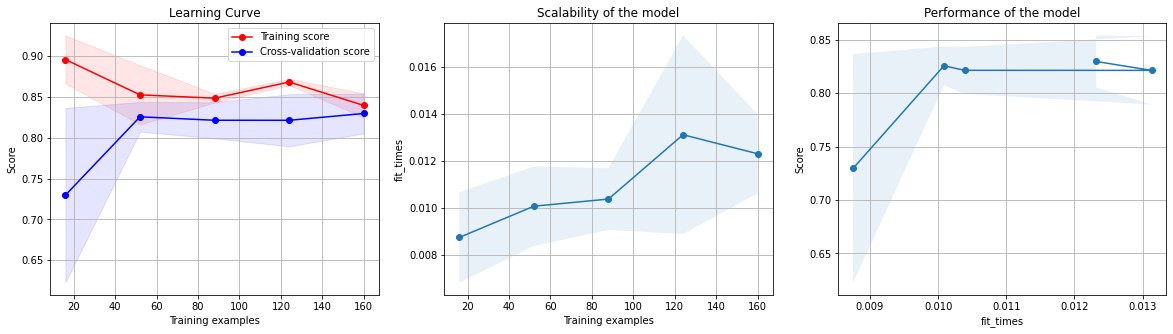

Logistic Regression
Standardization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8852459016393442
recall:  0.9354838709677419
precision:  0.8529411764705882
f1:  0.8923076923076922
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



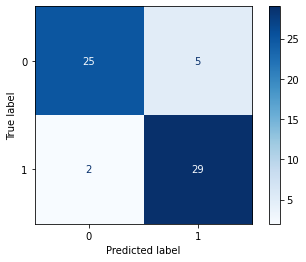

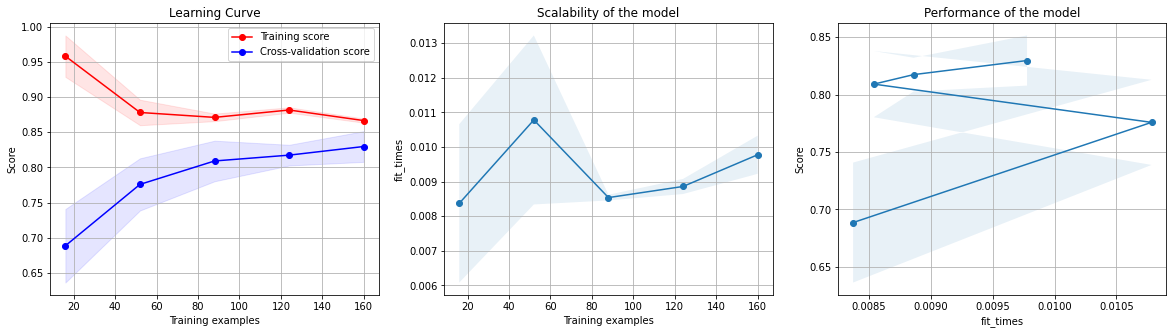

Logistic Regression
Log
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8852459016393442
recall:  0.9354838709677419
precision:  0.8529411764705882
f1:  0.8923076923076922
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



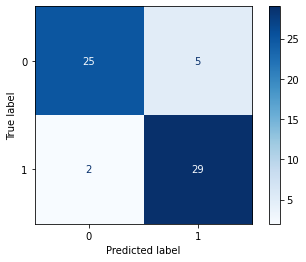

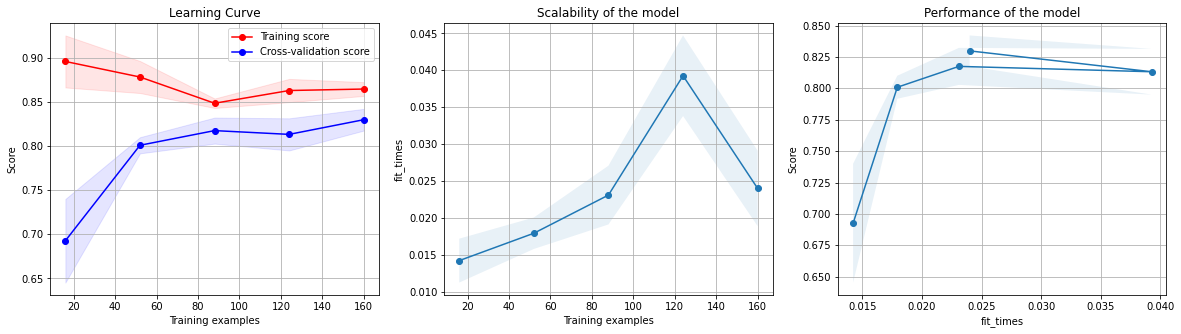

In [40]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=2021)

for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    run_model('Logistic Regression', logreg, X_train, X_test, y_train, y_test, fc_name, proba=True)

KNeighbors Classifier n_neighbors = 14
Raw
[1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1] 

accuracy:  0.7213114754098361
recall:  0.8387096774193549
precision:  0.6842105263157895
f1:  0.7536231884057972
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        30
           1       0.68      0.84      0.75        31

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



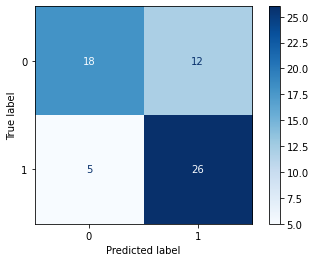

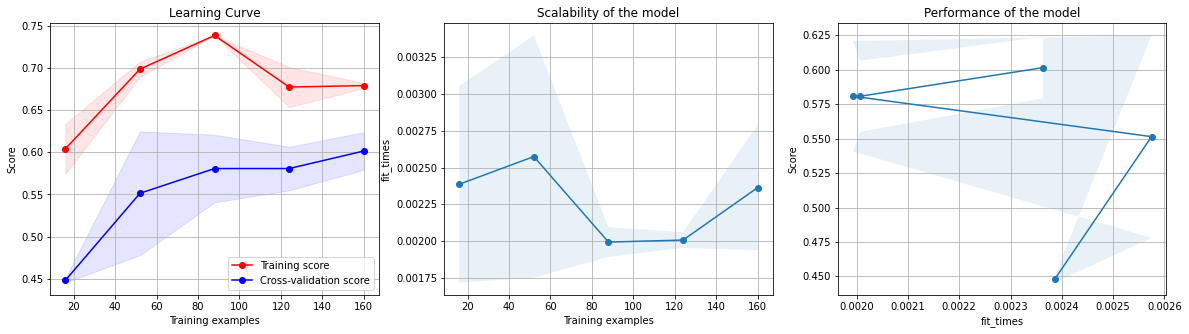

KNeighbors Classifier n_neighbors = 4
Normalization
[1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1] 

accuracy:  0.9016393442622951
recall:  0.8709677419354839
precision:  0.9310344827586207
f1:  0.9
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.93      0.87      0.90        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



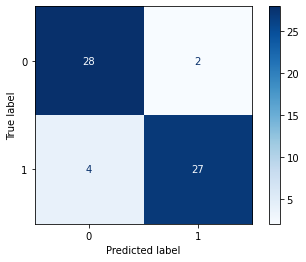

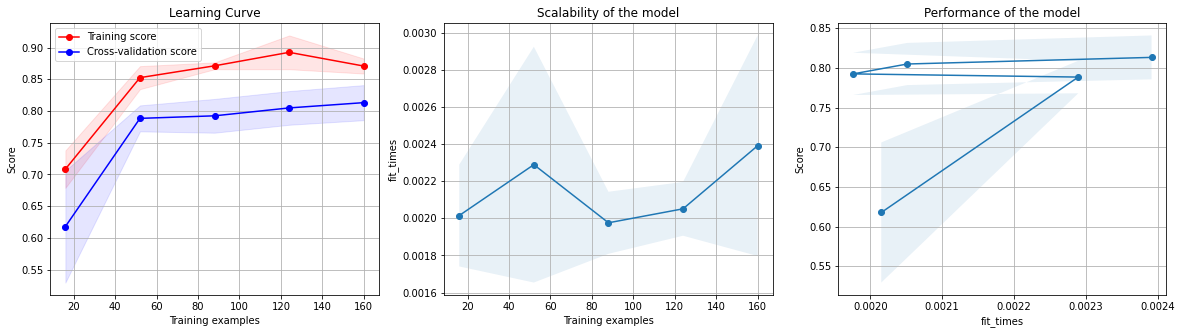

KNeighbors Classifier n_neighbors = 6
Standardization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1] 

accuracy:  0.8852459016393442
recall:  0.9354838709677419
precision:  0.8529411764705882
f1:  0.8923076923076922
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



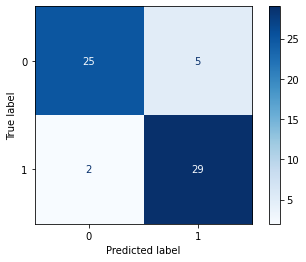

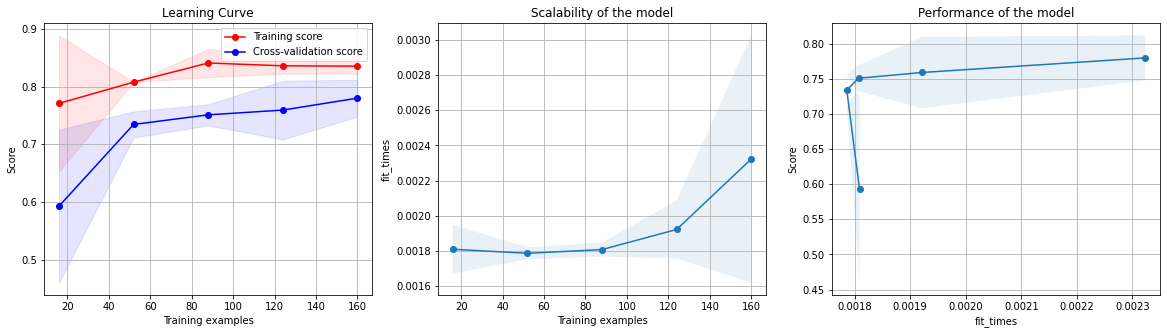

KNeighbors Classifier n_neighbors = 4
Log
[1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1] 

accuracy:  0.8688524590163934
recall:  0.8387096774193549
precision:  0.896551724137931
f1:  0.8666666666666666
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.90      0.84      0.87        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



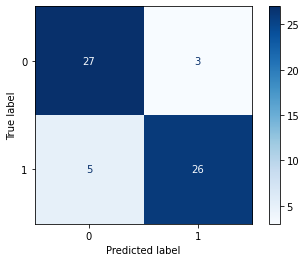

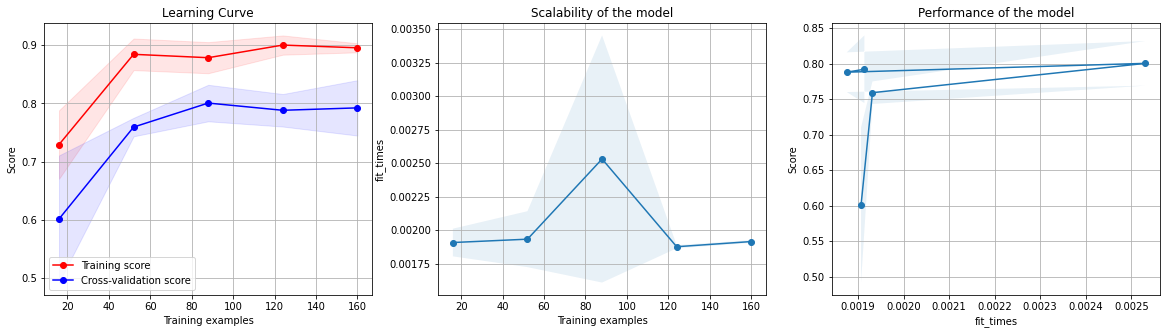

In [41]:
for fc_name, value in feature_scaling.items():
    scores_1 = []
    X_train, X_test, y_train, y_test = value
    
    for i in range(1,16):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        
        scores_1.append(accuracy_score(y_test, knn.predict(X_test)))
    
    max_val = max(scores_1)
    max_index = np.argmax(scores_1) + 1
    
    knn = KNeighborsClassifier(n_neighbors = max_index)
    knn.fit(X_train, y_train)

    run_model(f'KNeighbors Classifier n_neighbors = {max_index}', knn, X_train, X_test, y_train, y_test, fc_name)

DecisionTree Classifier
Raw
[1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0] 

accuracy:  0.7868852459016393
recall:  0.7741935483870968
precision:  0.8
f1:  0.7868852459016393
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.80      0.77      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



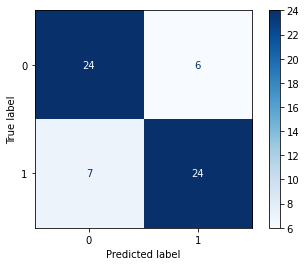

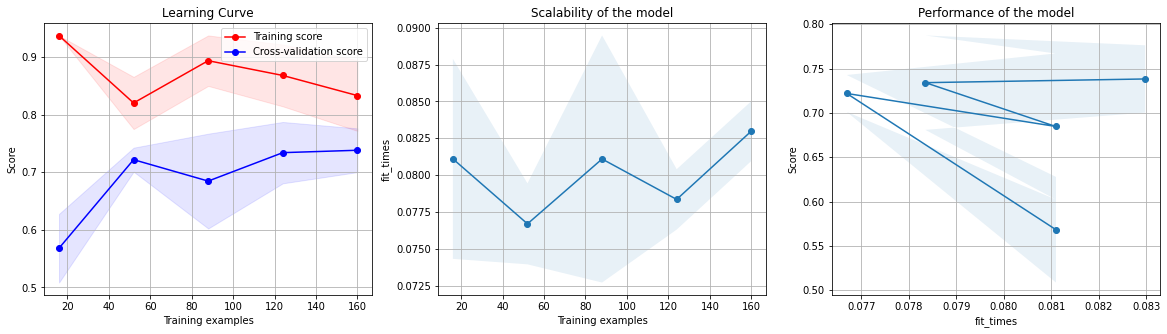

DecisionTree Classifier
Normalization
[1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0] 

accuracy:  0.7868852459016393
recall:  0.7741935483870968
precision:  0.8
f1:  0.7868852459016393
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.80      0.77      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



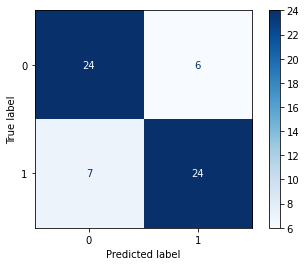

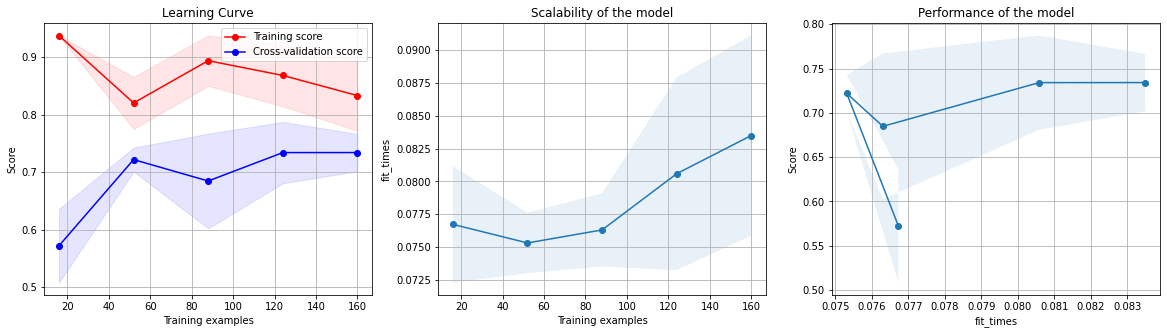

DecisionTree Classifier
Standardization
[1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0] 

accuracy:  0.7868852459016393
recall:  0.7741935483870968
precision:  0.8
f1:  0.7868852459016393
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.80      0.77      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



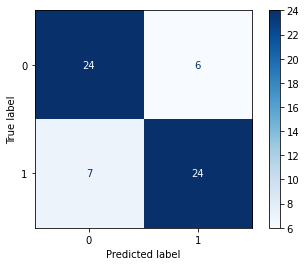

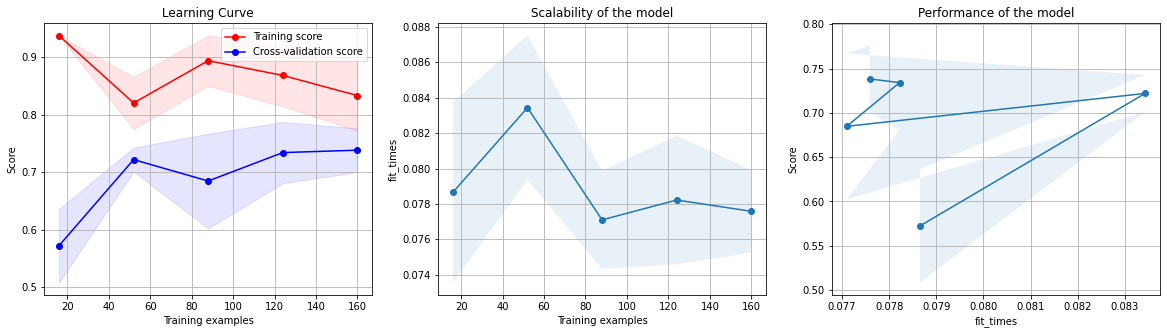

DecisionTree Classifier
Log
[1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0] 

accuracy:  0.7868852459016393
recall:  0.7741935483870968
precision:  0.8
f1:  0.7868852459016393
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.80      0.77      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



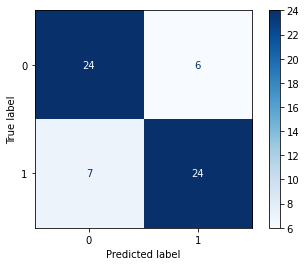

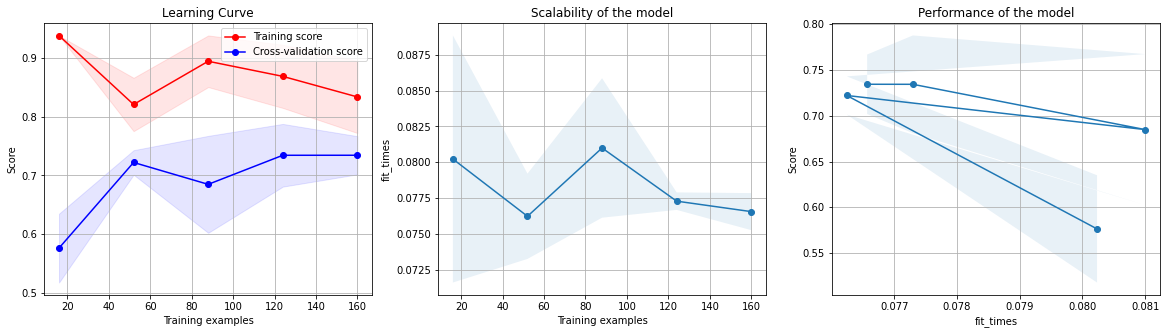

In [42]:
for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    
    dt = DecisionTreeClassifier()
    
    parameters = { 'max_depth':np.arange(1,5,1),'random_state':[2021]}
    searcher = GridSearchCV(dt, parameters)
    
    run_model('DecisionTree Classifier', searcher, X_train, X_test, y_train, y_test, fc_name )

RandomForest Classifier
Raw
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.819672131147541
recall:  0.9354838709677419
precision:  0.7631578947368421
f1:  0.8405797101449276
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        30
           1       0.76      0.94      0.84        31

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



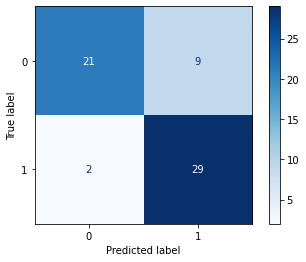

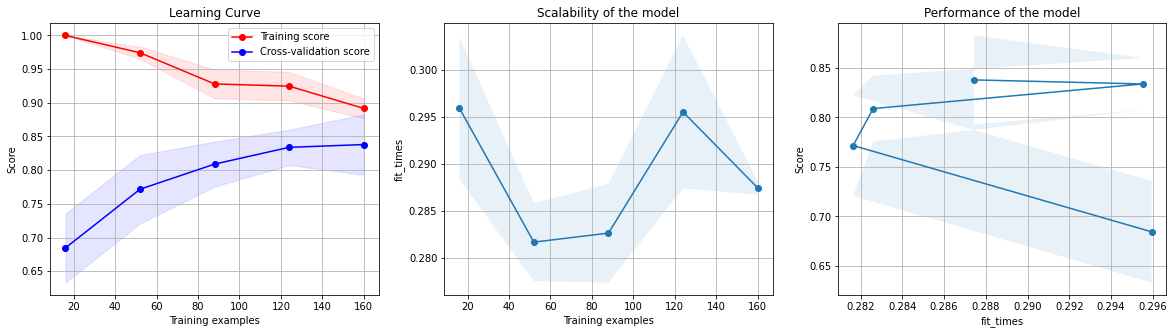

RandomForest Classifier
Normalization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.819672131147541
recall:  0.9354838709677419
precision:  0.7631578947368421
f1:  0.8405797101449276
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        30
           1       0.76      0.94      0.84        31

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



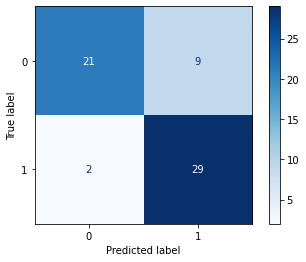

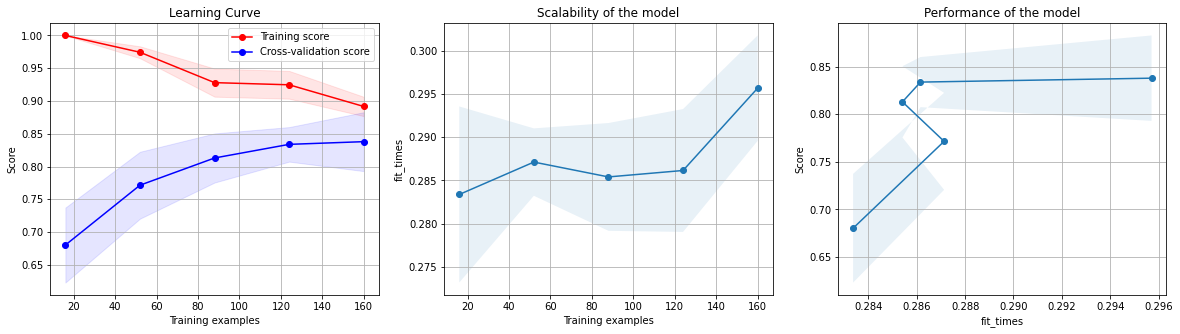

RandomForest Classifier
Standardization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.819672131147541
recall:  0.9354838709677419
precision:  0.7631578947368421
f1:  0.8405797101449276
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        30
           1       0.76      0.94      0.84        31

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



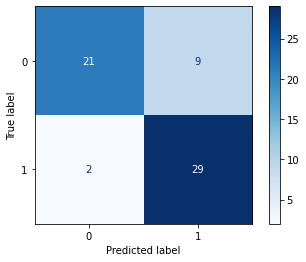

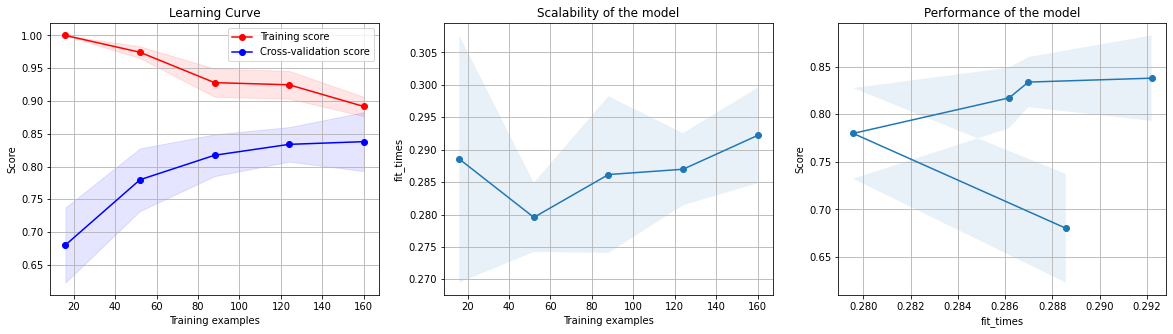

RandomForest Classifier
Log
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8360655737704918
recall:  0.9354838709677419
precision:  0.7837837837837838
f1:  0.8529411764705881
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.78      0.94      0.85        31

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



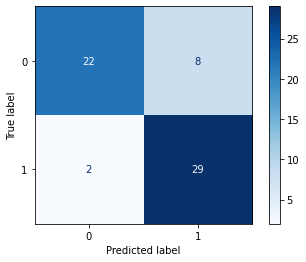

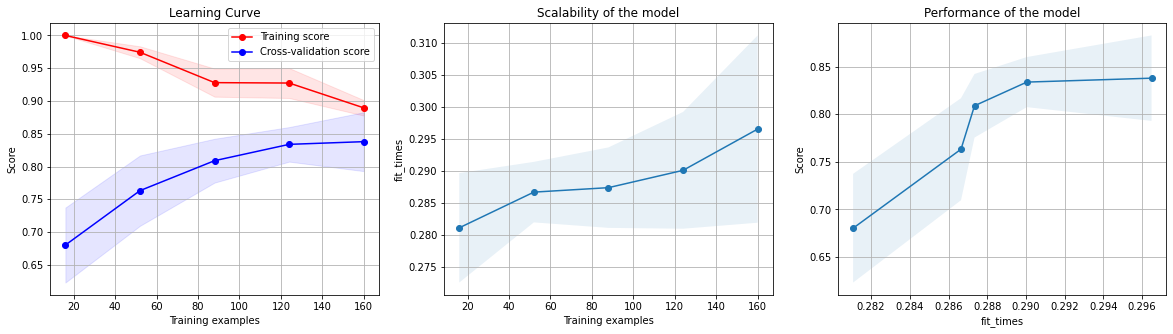

In [43]:
rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=2021)

for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    run_model('RandomForest Classifier', rf, X_train, X_test, y_train, y_test, fc_name)

GradientBoosting Classifier
Raw
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



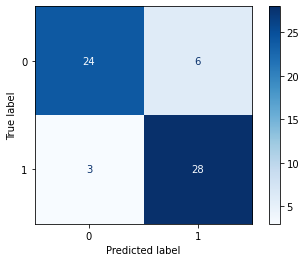

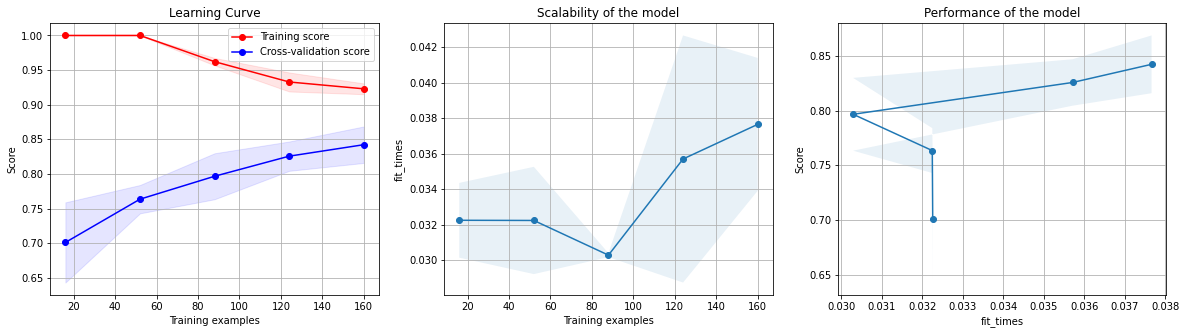

GradientBoosting Classifier
Normalization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



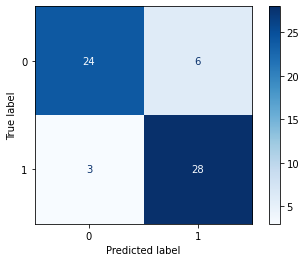

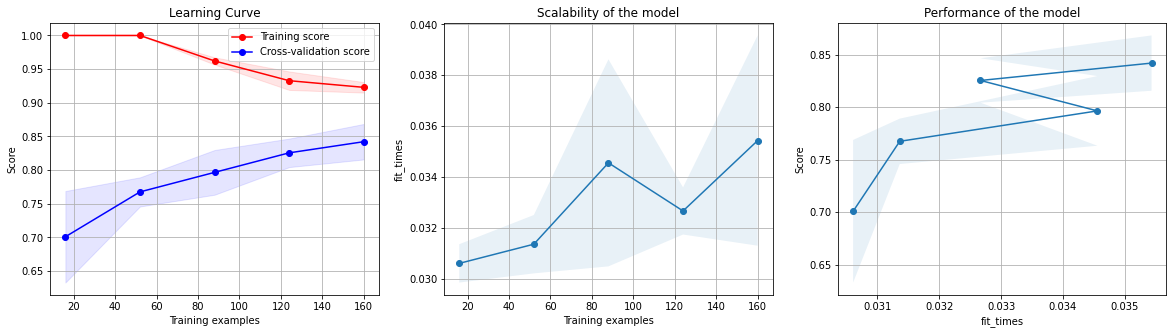

GradientBoosting Classifier
Standardization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



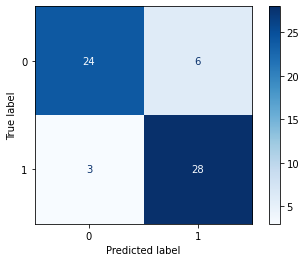

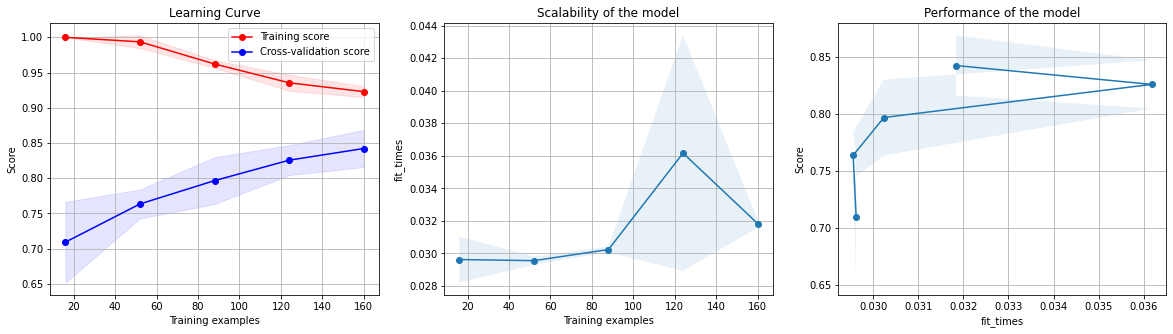

GradientBoosting Classifier
Log
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



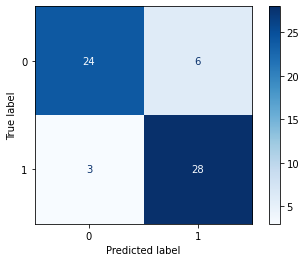

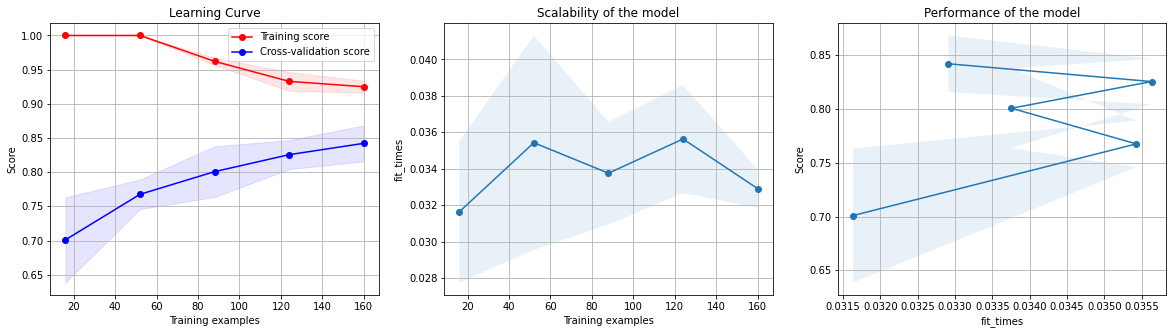

In [44]:
gbt = GradientBoostingClassifier(n_estimators = 50, max_depth=2, subsample=0.8, max_features=0.2, random_state=2021)
for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    run_model('GradientBoosting Classifier', gbt, X_train, X_test, y_train, y_test, fc_name)

XGBoost Classifier
Raw
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



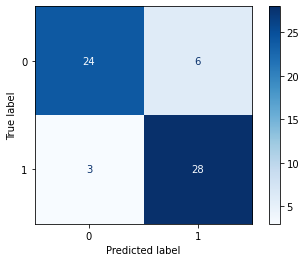

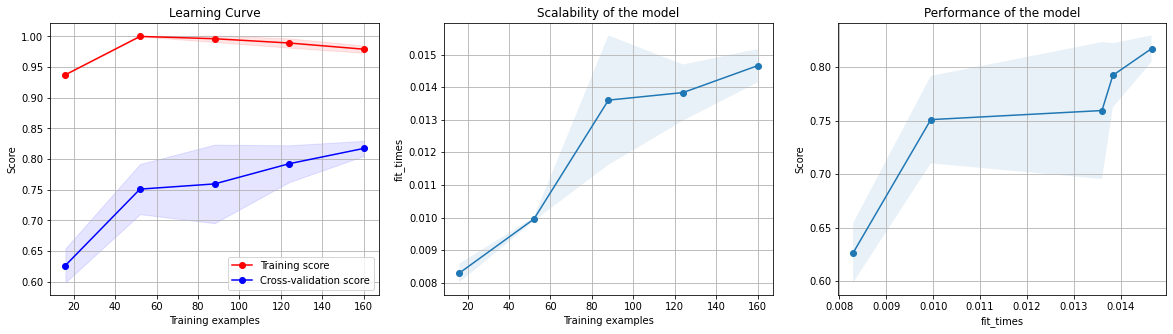

XGBoost Classifier
Normalization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



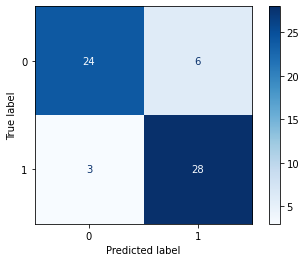

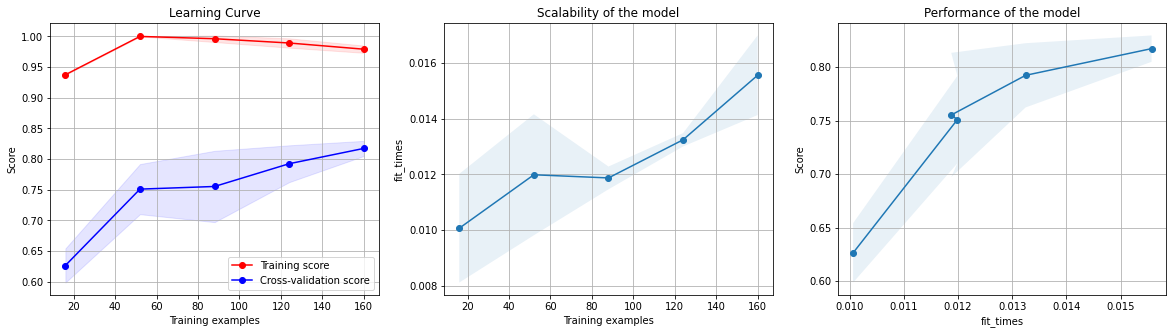

XGBoost Classifier
Standardization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



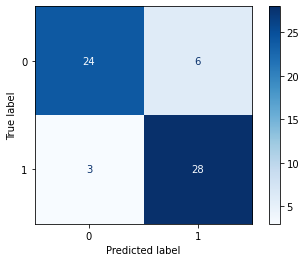

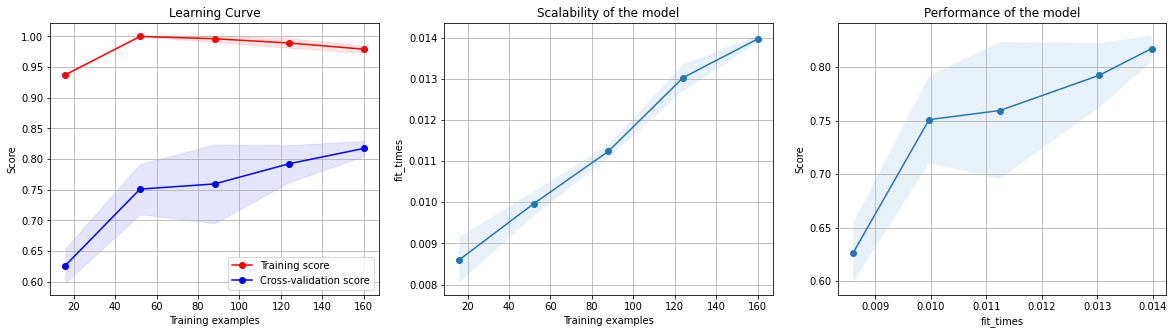

XGBoost Classifier
Log
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



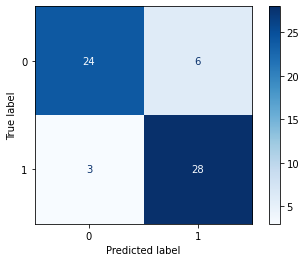

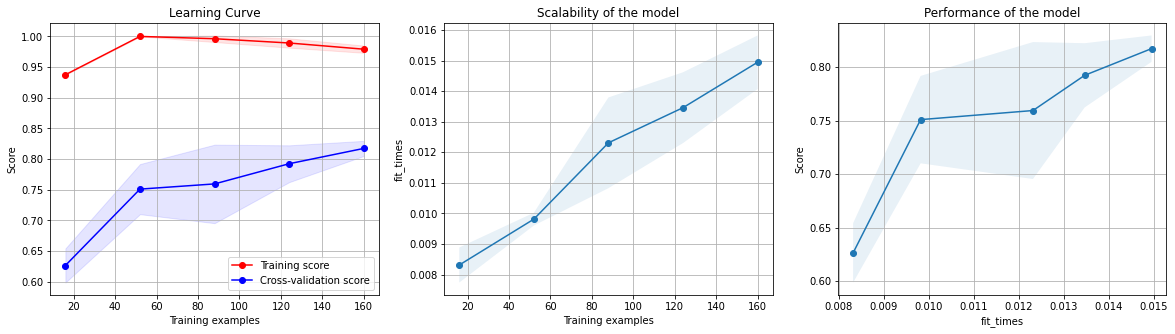

In [45]:
for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    xgb_model = xgb.XGBClassifier(n_estimators = 50, max_depth=3, random_state=2021, use_label_encoder=False, eval_metric='mlogloss')
        
    run_model('XGBoost Classifier', xgb_model, X_train, X_test, y_train, y_test, fc_name)

Lightgbm Classifier
Raw
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



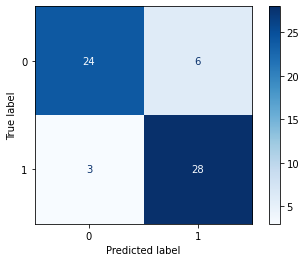

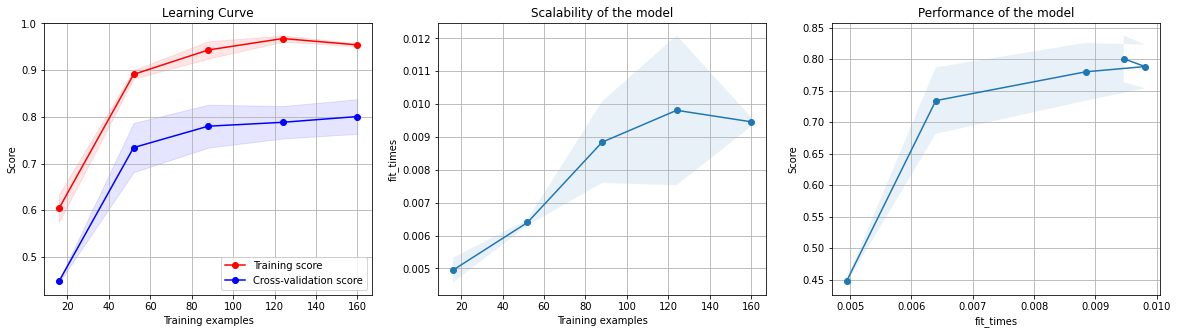

Lightgbm Classifier
Normalization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



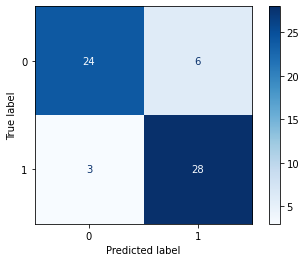

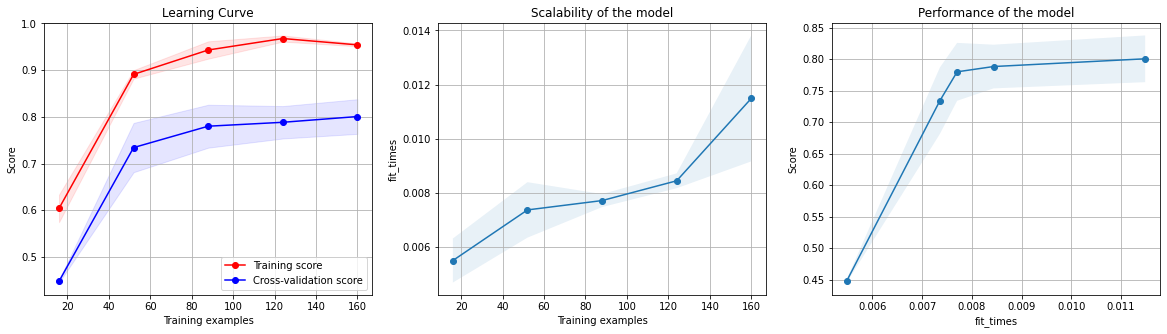

Lightgbm Classifier
Standardization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



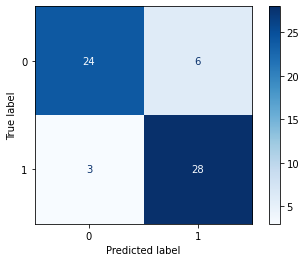

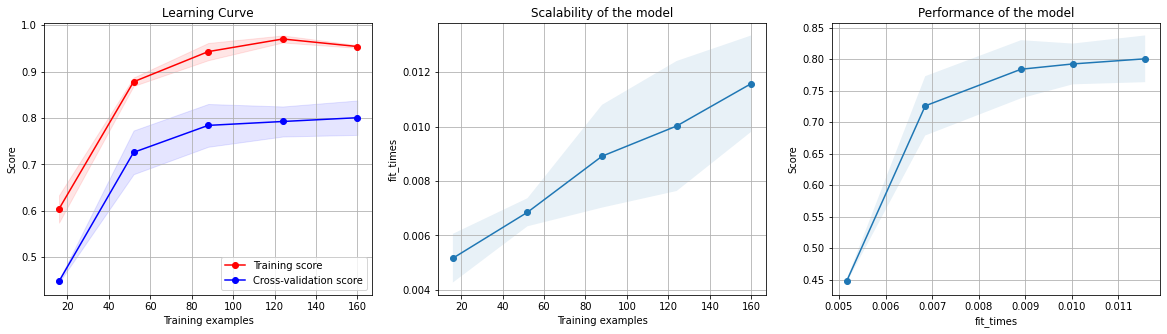

Lightgbm Classifier
Log
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9032258064516129
precision:  0.8235294117647058
f1:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



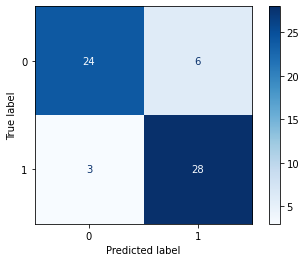

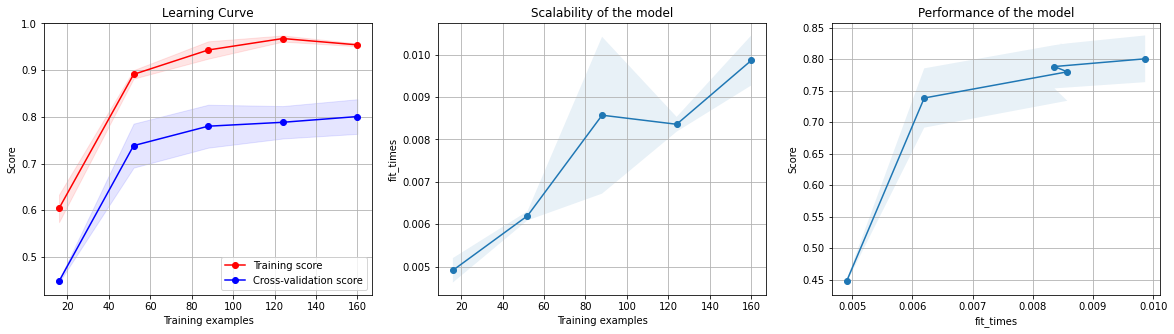

In [46]:
lgbm_model = lgbm.LGBMClassifier(max_depth = 3, n_estimators=50, subsample=0.8, random_state=2021)
for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    run_model('Lightgbm Classifier', lgbm_model, X_train, X_test, y_train, y_test, fc_name)

CatBoost Classifier
Raw
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8852459016393442
recall:  0.9354838709677419
precision:  0.8529411764705882
f1:  0.8923076923076922
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



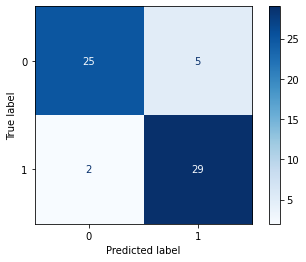

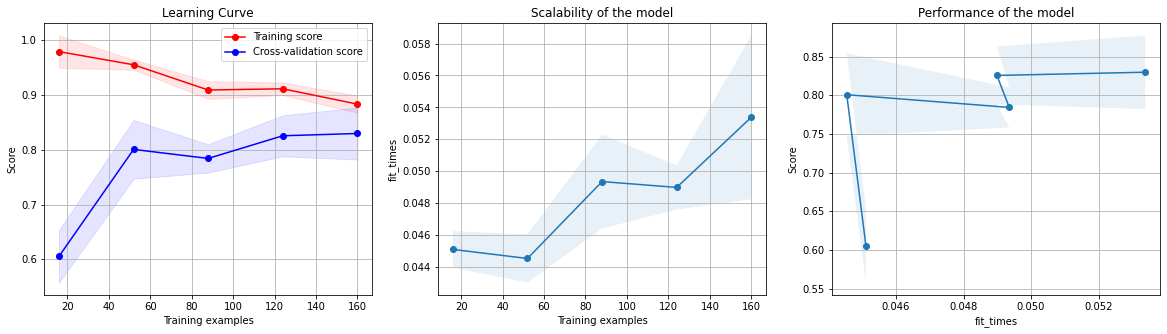

CatBoost Classifier
Normalization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8852459016393442
recall:  0.9354838709677419
precision:  0.8529411764705882
f1:  0.8923076923076922
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



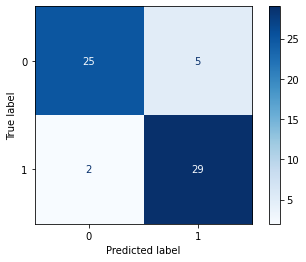

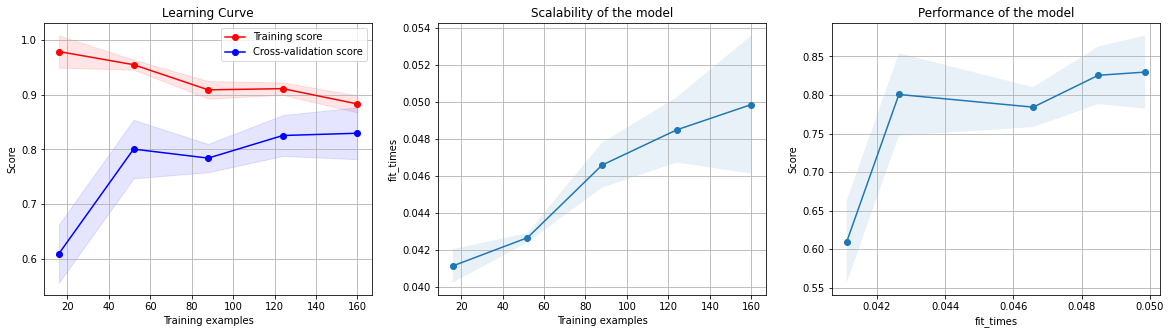

CatBoost Classifier
Standardization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8852459016393442
recall:  0.9354838709677419
precision:  0.8529411764705882
f1:  0.8923076923076922
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



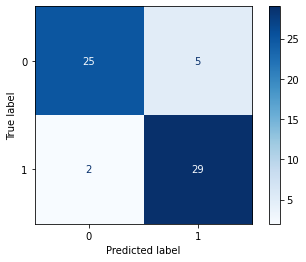

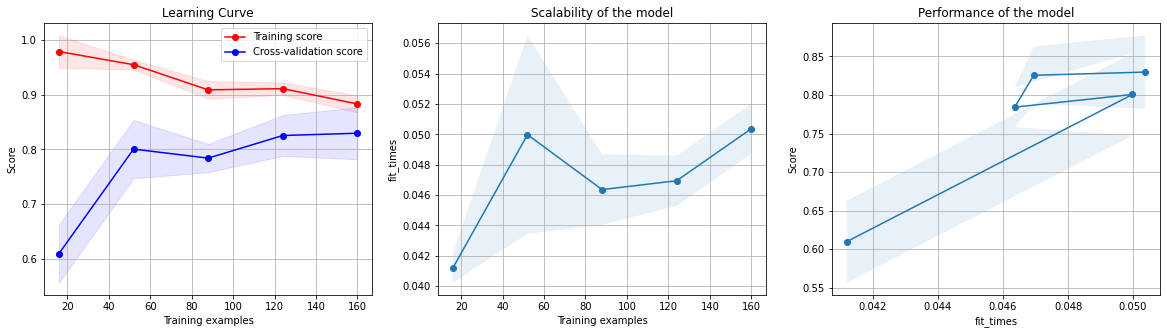

CatBoost Classifier
Log
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8852459016393442
recall:  0.9354838709677419
precision:  0.8529411764705882
f1:  0.8923076923076922
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



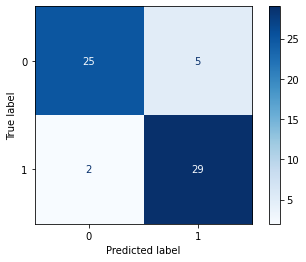

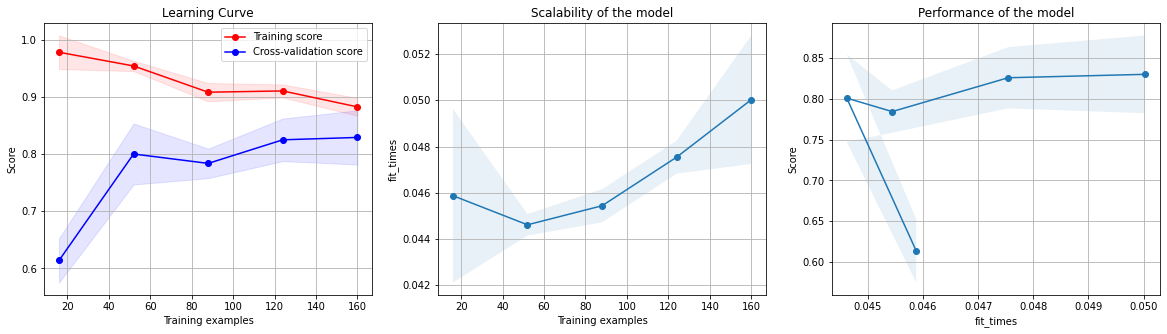

In [47]:
cat_model = ctb.CatBoostClassifier(n_estimators = 80, depth=3, subsample=0.8, random_state=2021, verbose=0)
for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value

    run_model('CatBoost Classifier',cat_model, X_train, X_test, y_train, y_test, fc_name)

## Artificial Neural Network (ANN)

#### `draw_learning_curve` - function to drawing learning curve history learning neural network
#### `callbacks` - function to generate unique callback to NN

In [48]:
def callbacks(name): 
    return [ 
        EarlyStopping(monitor = 'loss', patience = 7), 
        ReduceLROnPlateau(monitor = 'loss', patience = 4), 
        ModelCheckpoint(f'../working/{name}.hdf5', save_best_only=True) # saving the best model
    ]

def draw_learning_curve(history, keys=['accuracy', 'loss']):
    plt.figure(figsize=(20,8))
    for i, key in enumerate(keys):
        plt.subplot(1, 2, i + 1)
        sns.lineplot(x = history.epoch, y = history.history[key])
        sns.lineplot(x = history.epoch, y = history.history['val_' + key])
        plt.title('Learning Curve')
        plt.ylabel(key.title())
        plt.xlabel('Epoch')
        plt.legend(['train', 'test'], loc='best')
    plt.show()

## Creating and training NN

[1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1] 

accuracy:  0.7049180327868853
recall:  0.9032258064516129
precision:  0.6511627906976745
f1:  0.7567567567567568
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        30
           1       0.65      0.90      0.76        31

    accuracy                           0.70        61
   macro avg       0.74      0.70      0.69        61
weighted avg       0.74      0.70      0.69        61



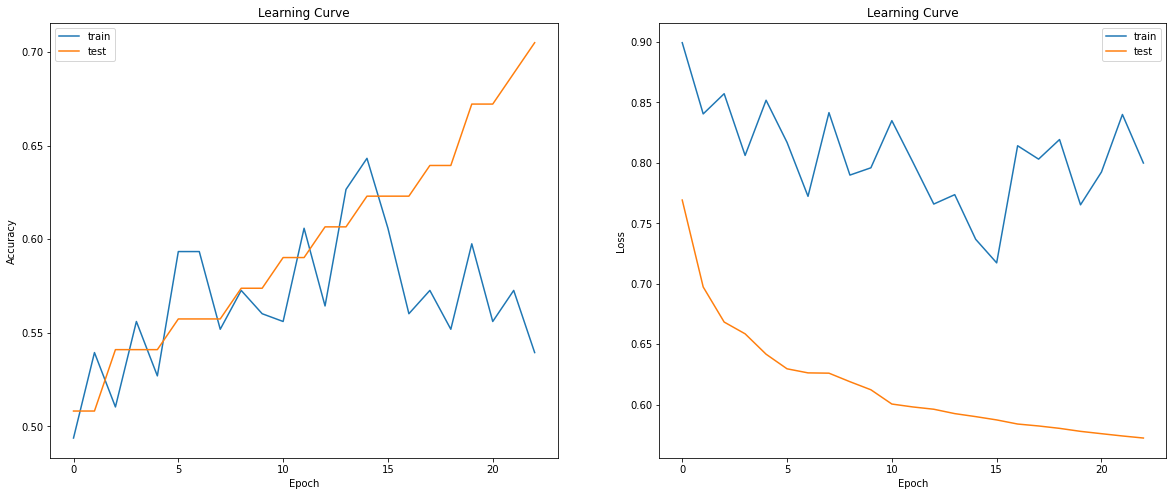

[1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1] 

accuracy:  0.819672131147541
recall:  0.9354838709677419
precision:  0.7631578947368421
f1:  0.8405797101449276
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        30
           1       0.76      0.94      0.84        31

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



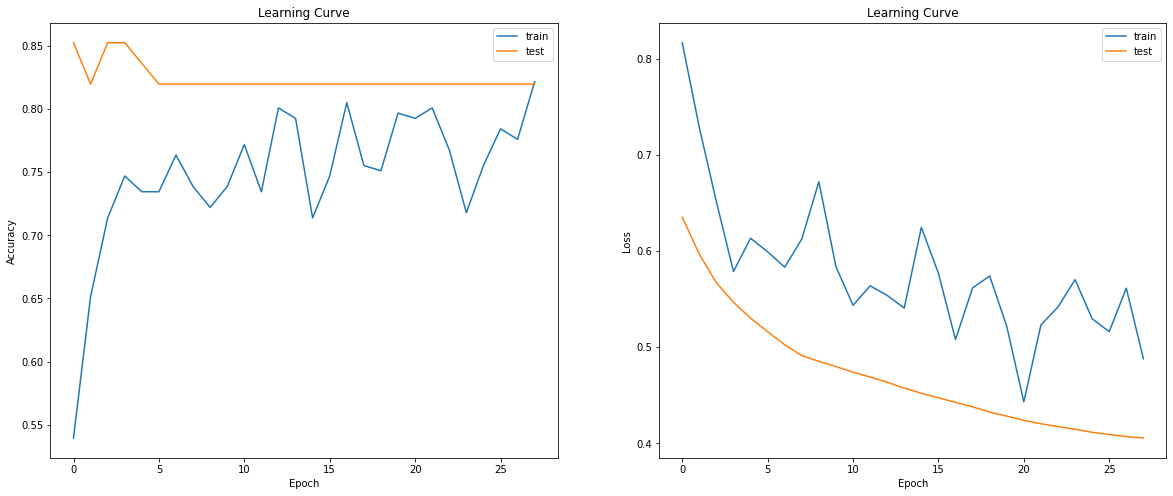

[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1] 

accuracy:  0.7868852459016393
recall:  0.9354838709677419
precision:  0.725
f1:  0.8169014084507041
              precision    recall  f1-score   support

           0       0.90      0.63      0.75        30
           1       0.72      0.94      0.82        31

    accuracy                           0.79        61
   macro avg       0.81      0.78      0.78        61
weighted avg       0.81      0.79      0.78        61



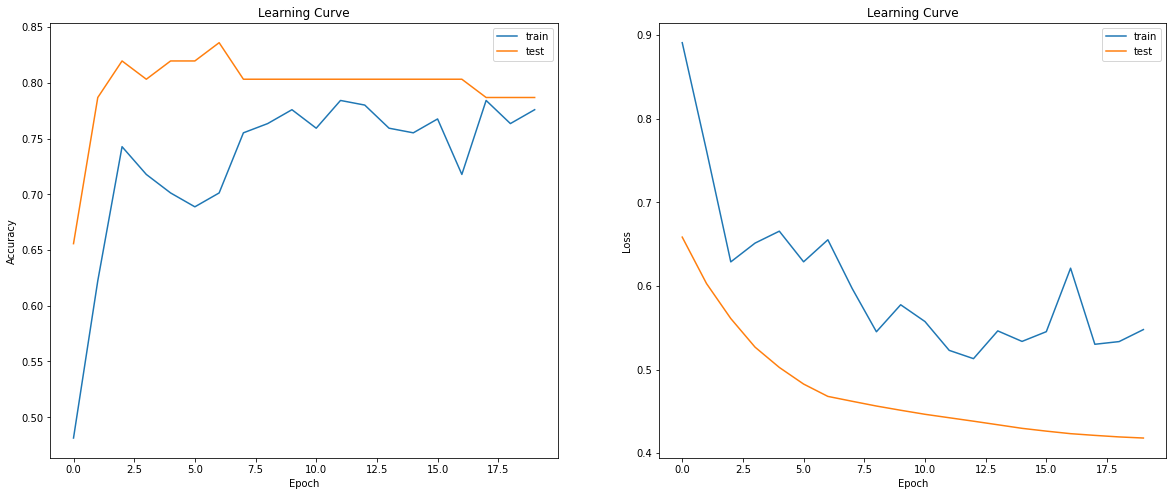

[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8032786885245902
recall:  0.9354838709677419
precision:  0.7435897435897436
f1:  0.8285714285714285
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        30
           1       0.74      0.94      0.83        31

    accuracy                           0.80        61
   macro avg       0.83      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61



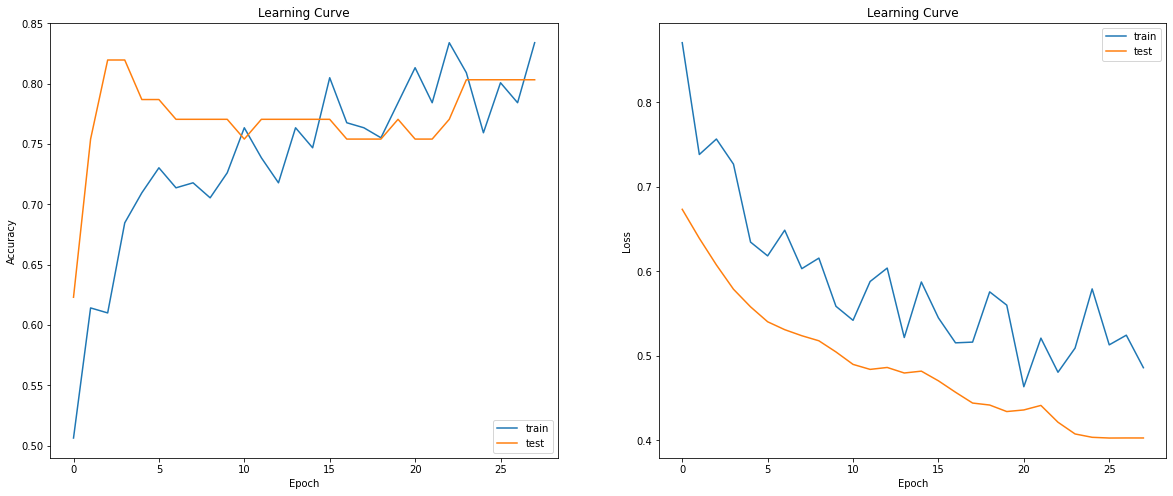

In [56]:
for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    X_train_nn, y_train_nn = X_train, y_train
    
    X_test_nn, y_test_nn = X_test, y_test
    y_train_nn = to_categorical(y_train_nn)    #converted to numpy array representing categories
    y_test_nn = to_categorical(y_test_nn)
    num_feats = X_train_nn.shape[1]
    num_classes = 2

    model = Sequential([

            Dense(100, input_dim = num_feats, activation='relu'),
            Dropout(0.7),
            BatchNormalization(),
            Dense(700, input_dim = num_feats, activation='relu'),
            Dropout(0.7),
            BatchNormalization(),

            Dense(num_classes, activation='softmax')
        ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     model.summary()

    learning_history = model.fit(X_train_nn, y_train_nn,
              batch_size = 32, epochs = 100, verbose = 0,
              callbacks = callbacks('mlp'),
              validation_data = (X_test_nn, y_test_nn)
            );
    
    model = load_model('../working/mlp.hdf5')
    y_pred = model.predict(X_test_nn, verbose = 0)
    y_pred = np.argmax(y_pred, axis = 1)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(y_pred,'\n')
    print('accuracy: ', accuracy)
    print('recall: ',recall)
    print('precision: ', precision)
    print('f1: ', f1)
    print(classification_report(y_test, y_pred))

    draw_learning_curve(learning_history)

    list_scores.append({'Model Name': 'Neural Network', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1':f1, 'Feature Scaling':fc_name})

## Summary scores

In [50]:
df_scores = pd.DataFrame(list_scores)
df_scores.style.highlight_max(color = 'lightgreen', axis = 0)

### The best model for this dataset - SVC, Logistic Regression, RandomForest Classifier, CatBoost Classifier and Neural Netfork.

SVC
Raw
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8688524590163934
recall:  0.9354838709677419
precision:  0.8285714285714286
f1:  0.8787878787878788
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.83      0.94      0.88        31

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



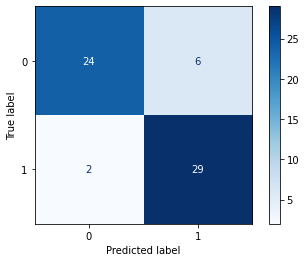

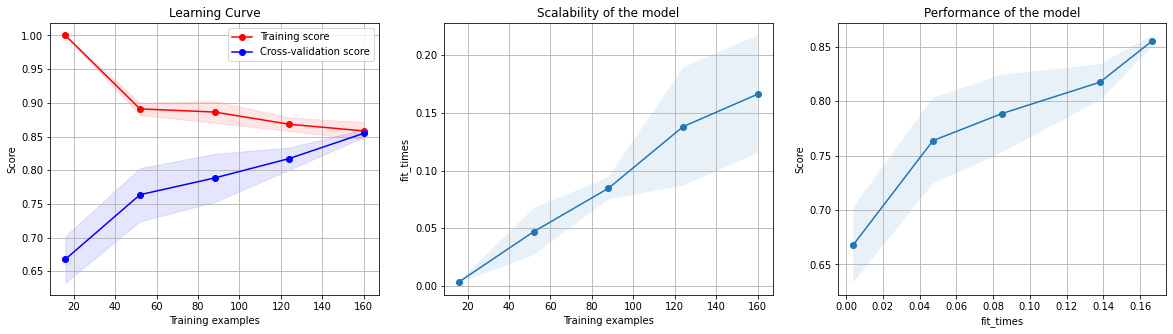

SVC
Normalization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9354838709677419
precision:  0.8055555555555556
f1:  0.8656716417910448
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.81      0.94      0.87        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



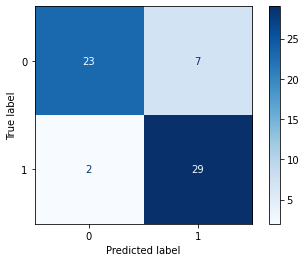

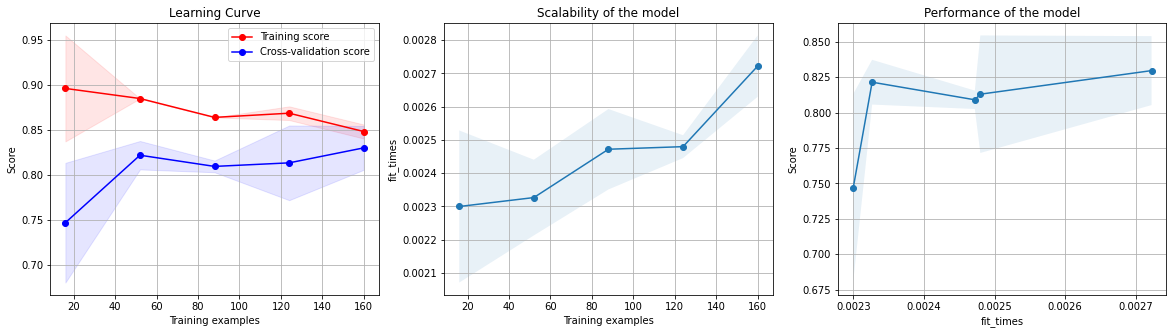

SVC
Standardization
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8688524590163934
recall:  0.9354838709677419
precision:  0.8285714285714286
f1:  0.8787878787878788
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.83      0.94      0.88        31

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



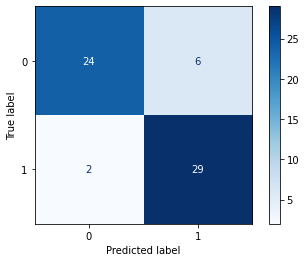

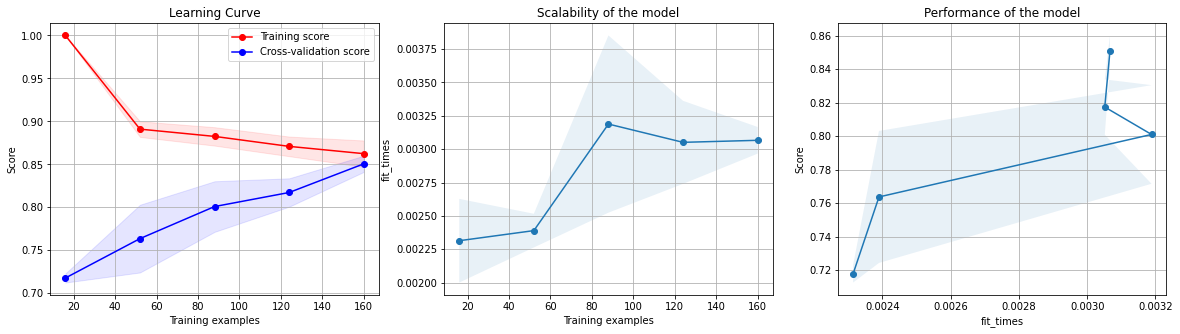

SVC
Log
[1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1] 

accuracy:  0.8524590163934426
recall:  0.9354838709677419
precision:  0.8055555555555556
f1:  0.8656716417910448
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.81      0.94      0.87        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



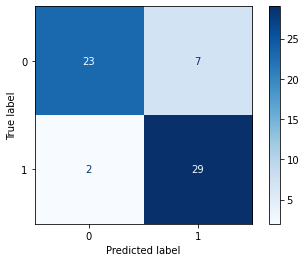

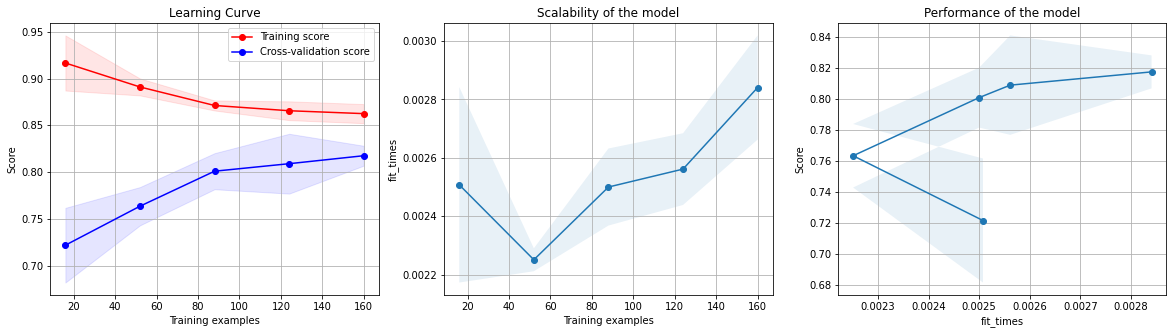

In [51]:
model_svc = SVC(kernel='linear', C=1, random_state=2021)
for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    run_model('SVC', model_svc, X_train, X_test, y_train, y_test, fc_name)

### Most important features for model

In [52]:
model_svc = SVC(kernel='linear', C=1, random_state=2021)
model_svc.fit(X_train, y_train)

imp = PermutationImportance(model_svc, random_state = 2021).fit(X_train, y_train)
eli5.show_weights(imp, feature_names = X_train.columns.values, top = 15)

# Summary

### For the Heart Disease Predictions, recall is most important evaluation measures accuracy of the models. We have 5 models reached recall of 93.5 %, which means False Negative is small. But this is not enough. Ideally we hope recall can reach 99.5 % so that a very few patients can be predicted health but actually not.
### To improve the model, one way is hyperparameters fine tune; another way is to collect much more data. For neural network, we can expect better accuracy with big data.